<a href="https://colab.research.google.com/github/GentaJuan/Genta-Juan-Alberto/blob/main/Proyectofinal_GentaJuan_61680.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PRESENTACIÓN DEL PROYECTO**
MODELO DE PREDICCION PARA LA REPRODUCCION EN TAMBOS


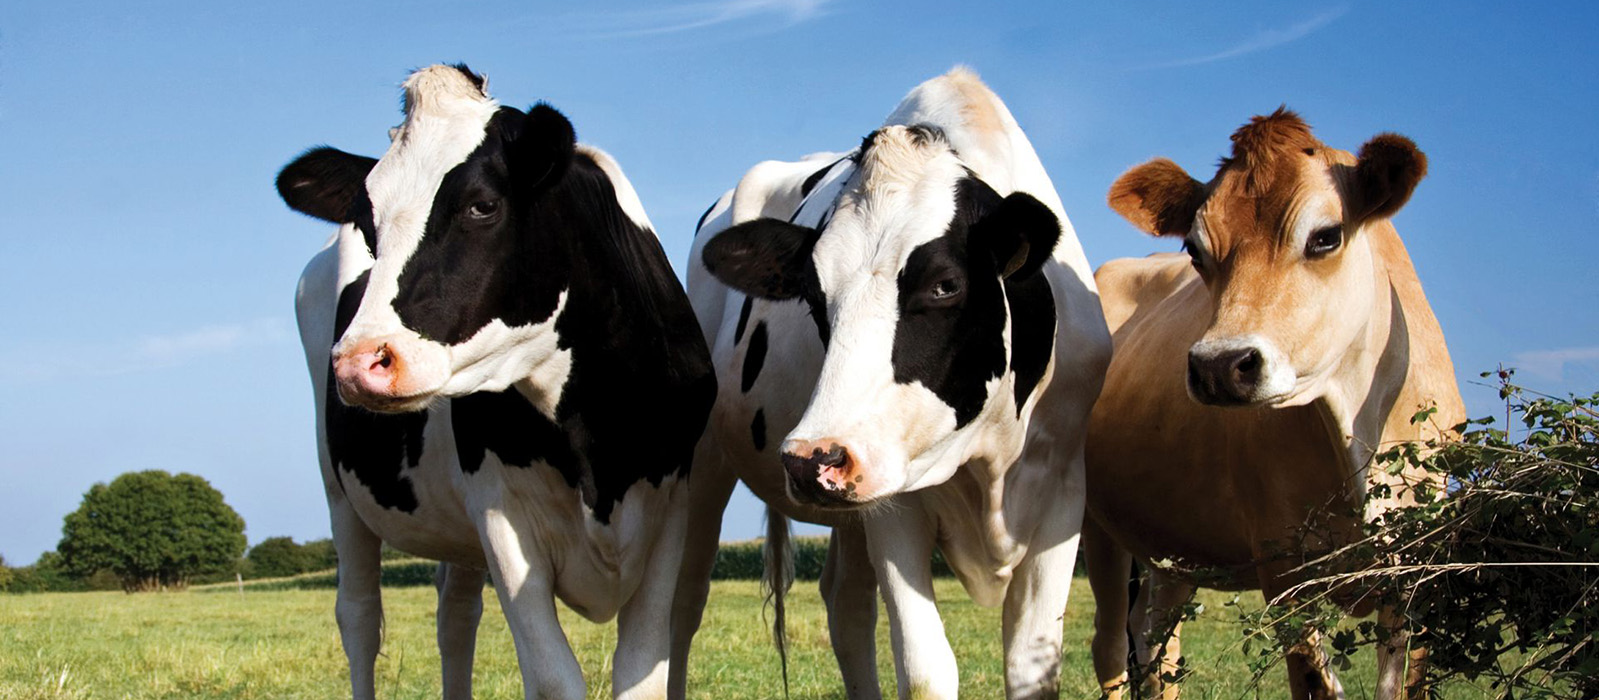

En los tambos, para tomar buenas decisiones de manejo es necesario hacer un monitoreo rutinario y consistente con mediciones precisas de los indicadores reproductivos para reducir los días improductivos y mejorar la sustentabilidad (Thatcher et al., 2006).
Aunque las prácticas de manejo en los tambos comerciales varían considerablemente en distintos escenarios productivos, el principal objetivo reproductivo de un tambo es siempre preñar a las vacas lo más rápido posible (Ferguson y Galligan, 1993; Lucy et al., 2004).
# En Argentina los establecimientos lecheros utilizan distintos indicadores para monitorear el desempeño reproductivo, como son los días a primer servicio (D1S), el número de servicios por preñez (NS) y la tasa de concepción (TC) entre otros. La TC es la proporción de los servicios dados que originan preñeces.
Existen antecedentes que indican que la pérdida en la eficiencia reproductiva se asocia a distintas fuentes de variación. Además de la asociación con el aumento de la producción de leche (Dematawewa y Berger, 1998;Lucy, 2001; Price y Harris, 2004) los indicadores reproductivos muestran una importante variación estacional,siendo las estaciones frías en general más favorables (Lucy, 2001; Jordan, 2003; López-Gatius, 2003; De Vries y Risco, 2005; Silvestrini et al., 2011a; Silvestrini et al., 2011b). El número de lactancia es también un factor
conocido que afecta los indicadores reproductivos (Weigel, 2004; Winding et al., 2005).
Otra fuente de variación en los indicadores reproductivos es el tipo de servicio utilizado (Williamson et al., 1978; De Vries et al., 2005;Olynk y Wolf, 2008; Lima et al., 2009; Lima et al., 2010). El uso de protocolos de inseminación artificial o con tiempo fijo (Thatcher et al., 2006; Veneranda et al., 2006; Veneranda et al., 2008; Souza et al., 2009), que han aumentado en la región central de Argentina (Bo et al., 2009) podría mejorar los beneficios económicos a través del control de los DV. Sin embargo, hay poca información regional sobre los costos de los sistemas de producción de leche (Capitaine Funes et al., 2007).
En Argentina, poco se conoce de estos costos, no obstante es claro que cuando la performance reproductivo aumenta, existe un cambio favorable en el flujo de caja, pero su importancia relativa respecto a indicadores de eficiencia productiva debe cuantificarse (Cattaneo et al., 2012).

### ALCANCE
El análisis será presentado al CEO de la empresa y los distintos profesionales del área, que dispondrán de la
información para realizar cambios según los resultados obtenidos.
El usuario final de destino será el CEO de la empresa y los distintos líderes del área, y se aplicará con una visión
estratégica.

### PLANTEAMIENTO DEL PROBLEMA
Queremos predecir si una vaca está vacía o preñada en función de diferentes variables relacionadas con su historial reproductivo y de salud.

###HIPÓTESIS
Las vacas con una mayor edad y número de lactancias, antecedentes de mastitis y enfermedades puerperales, alta cantidad de inseminaciones y problemas reproductivos previos tienen una menor probabilidad de estar preñadas.

### OBJETIVO
Teniendo en cuenta el gran impacto de la reproduccion sobre la rentabilidad de la empresa, el objetivo de este proyecto es predecir el resultado de una inseminación mediante un modelo de clasificación, estimando así el porcentaje de concepción de acuerdo a las distintas variables.

## **LECTURA DE DATOS**

GALERIAS UTILIZADAS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### CONFIGURACION DEL ENTORNO EN GOOGLE COLAB
A continuación se agrega el archivo extraído de la base de datos Dairy comp del tambo.


In [ ]:


  # Configuramos el entorno de Python en Google Colab
from google.colab import drive
import os

drive.mount("/content/drive")
print(os.getcwd())

os.chdir("/content/drive/My Drive/")
print(os.getcwd())

#Importamos un dataset sobre inseminaciones con una mayor cantidad de datos. En este se quisiera analizar la relacion del las enfermedades y variables del animal sobre el resultado de las inseminaciones.
df = pd.read_excel('/content/drive/MyDrive/CODERHOUSE/DataScience/Trabajo_final/Inseminaciones_Tm.xlsx')
df

Mounted at /content/drive
/content
/content/drive/My Drive


Id  Edad  Lact      Fnaci      Fpart  Dabi  Vanes  D1anestro  Vhipo  \
0       383   145     7  01/05/09   17/02/20    492      0          0      0   
1       458   116     7  17/05/10   31/08/19    164      0          0      0   
2       464   127     7  11/06/10   27/08/19    241      0          0      0   
3       464   127     7  11/06/10   27/08/19    241      0          0      0   
4       464   127     7  11/06/10   27/08/19    241      0          0      0   
...     ...   ...   ...        ...        ...   ...    ...        ...    ...   
9036  93244   118     6  05/08/13   10/03/22    185      0          0      1   
9037  93244   118     6  05/08/13   10/03/22    185      0          0      1   
9038  93244   118     6  05/08/13   10/03/22    185      0          0      1   
9039  93244   118     6  05/08/13   10/03/22    185      0          0      1   
9040  93244   118     6  05/08/13   10/03/22    185      0          0      1   

      Vretp  ...  Vmta  Vvta       Evento  Del      Fecha              Toro  \
0         1  ...     0     1  INSEMIN       72  29/04/20   IGNITION           
1         0  ...     0     1  INSEMIN      138  16/01/20   POSH               
2         0  ...     0     0  INSEMIN      139  13/01/20   POSH               
3         0  ...     0     0  INSEMIN      160  03/02/20   BACK9              
4         0  ...     0     0  INSEMIN      202  16/03/20   IGNITION           
...     ...  ...   ...   ...          ...  ...        ...               ...   
9036      0  ...     1     0  INSEMIN       69  18/05/22   CURRY              
9037      0  ...     1     0  INSEMIN       98  16/06/22   HIGHEND            
9038      0  ...     1     0  INSEMIN      123  11/07/22   HIGHEND            
9039      0  ...     1     0  INSEMIN      149  06/08/22   HIGHEND            
9040      0  ...     1     0  INSEMIN      185  11/09/22   HIGHEND            

      Resultado  Tecnico Codigo  Tecnico_nombre  
0            O        16     H             Toto  
1           NaN       16     N             Toto  
2            O        16     N             Toto  
3            O        16     N             Toto  
4            O        16     N             Toto  
...         ...      ...    ...             ...  
9036         O        16     Q             Toto  
9037         O        16     N             Toto  
9038         O        16     N             Toto  
9039         O        16     N             Toto  
9040         P        16     N             Toto  

[9041 rows x 26 columns]

## **ANALISIS EXPLORATORIO DE DATOS**

In [ ]:
df.head()

Id  Edad  Lact      Fnaci      Fpart  Dabi  Vanes  D1anestro  Vhipo  \
0  383   145     7  01/05/09   17/02/20    492      0          0      0   
1  458   116     7  17/05/10   31/08/19    164      0          0      0   
2  464   127     7  11/06/10   27/08/19    241      0          0      0   
3  464   127     7  11/06/10   27/08/19    241      0          0      0   
4  464   127     7  11/06/10   27/08/19    241      0          0      0   

   Vretp  ...  Vmta  Vvta       Evento  Del      Fecha              Toro  \
0      1  ...     0     1  INSEMIN       72  29/04/20   IGNITION           
1      0  ...     0     1  INSEMIN      138  16/01/20   POSH               
2      0  ...     0     0  INSEMIN      139  13/01/20   POSH               
3      0  ...     0     0  INSEMIN      160  03/02/20   BACK9              
4      0  ...     0     0  INSEMIN      202  16/03/20   IGNITION           

   Resultado  Tecnico Codigo  Tecnico_nombre  
0         O        16     H             Toto  
1        NaN       16     N             Toto  
2         O        16     N             Toto  
3         O        16     N             Toto  
4         O        16     N             Toto  

[5 rows x 26 columns]

In [ ]:
df.tail()

Id  Edad  Lact      Fnaci      Fpart  Dabi  Vanes  D1anestro  Vhipo  \
9036  93244   118     6  05/08/13   10/03/22    185      0          0      1   
9037  93244   118     6  05/08/13   10/03/22    185      0          0      1   
9038  93244   118     6  05/08/13   10/03/22    185      0          0      1   
9039  93244   118     6  05/08/13   10/03/22    185      0          0      1   
9040  93244   118     6  05/08/13   10/03/22    185      0          0      1   

      Vretp  ...  Vmta  Vvta       Evento  Del      Fecha              Toro  \
9036      0  ...     1     0  INSEMIN       69  18/05/22   CURRY              
9037      0  ...     1     0  INSEMIN       98  16/06/22   HIGHEND            
9038      0  ...     1     0  INSEMIN      123  11/07/22   HIGHEND            
9039      0  ...     1     0  INSEMIN      149  06/08/22   HIGHEND            
9040      0  ...     1     0  INSEMIN      185  11/09/22   HIGHEND            

      Resultado  Tecnico Codigo  Tecnico_nombre  
9036         O        16     Q             Toto  
9037         O        16     N             Toto  
9038         O        16     N             Toto  
9039         O        16     N             Toto  
9040         P        16     N             Toto  

[5 rows x 26 columns]

In [ ]:
df.shape

(9041, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9041 entries, 0 to 9040
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              9041 non-null   int64 
 1   Edad            9041 non-null   int64 
 2   Lact            9041 non-null   int64 
 3   Fnaci           9041 non-null   object
 4   Fpart           9041 non-null   object
 5   Dabi            9041 non-null   int64 
 6   Vanes           9041 non-null   int64 
 7   D1anestro       9041 non-null   int64 
 8   Vhipo           9041 non-null   int64 
 9   Vretp           9041 non-null   int64 
 10  Vmetr           9041 non-null   int64 
 11  Vmast           9041 non-null   int64 
 12  Dmast1          9041 non-null   int64 
 13  Vrenga          9041 non-null   int64 
 14  Drenga1         9041 non-null   int64 
 15  Pcet1           2434 non-null   object
 16  Vmta            9041 non-null   int64 
 17  Vvta            9041 non-null   int64 
 18  Evento  

In [ ]:
df.isnull().sum()

Id                   0
Edad                 0
Lact                 0
Fnaci                0
Fpart                0
Dabi                 0
Vanes                0
D1anestro            0
Vhipo                0
Vretp                0
Vmetr                0
Vmast                0
Dmast1               0
Vrenga               0
Drenga1              0
Pcet1             6607
Vmta                 0
Vvta                 0
Evento               0
Del                  0
Fecha                0
Toro                 0
Resultado          116
Tecnico              0
Codigo               1
Tecnico_nombre       0
dtype: int64

In [ ]:
df.describe().T

count         mean          std    min     25%     50%     75%  \
Id         9041.0  3066.178078  4531.361915  383.0  1454.0  1947.0  3533.0   
Edad       9041.0    62.108284    22.549623   25.0    44.0    57.0    77.0   
Lact       9041.0     2.660878     1.662185    1.0     1.0     2.0     4.0   
Dabi       9041.0   221.476164   183.877619   39.0    98.0   160.0   270.0   
Vanes      9041.0     0.109391     0.450026    0.0     0.0     0.0     0.0   
D1anestro  9041.0     6.161597    24.263922    0.0     0.0     0.0     0.0   
Vhipo      9041.0     0.032850     0.186741    0.0     0.0     0.0     0.0   
Vretp      9041.0     0.150868     0.448722    0.0     0.0     0.0     0.0   
Vmetr      9041.0     0.267780     0.629010    0.0     0.0     0.0     0.0   
Vmast      9041.0     0.827453     1.382925    0.0     0.0     0.0     1.0   
Dmast1     9041.0    58.742396   120.070632    0.0     0.0     0.0    48.0   
Vrenga     9041.0     0.394536     0.789428    0.0     0.0     0.0     1.0   
Drenga1    9041.0   258.922243   507.742501    0.0     0.0     0.0   167.0   
Vmta       9041.0     0.027984     0.164935    0.0     0.0     0.0     0.0   
Vvta       9041.0     0.187479     0.390317    0.0     0.0     0.0     0.0   
Del        9041.0   112.782657    65.654231   25.0    64.0    90.0   143.0   
Tecnico    9041.0    15.132950     4.408311    3.0    16.0    16.0    16.0   

               max  
Id         93244.0  
Edad         150.0  
Lact          11.0  
Dabi        1533.0  
Vanes          5.0  
D1anestro    297.0  
Vhipo          2.0  
Vretp          4.0  
Vmetr          4.0  
Vmast          9.0  
Dmast1      1240.0  
Vrenga         7.0  
Drenga1     2064.0  
Vmta           1.0  
Vvta           1.0  
Del          520.0  
Tecnico       25.0

In [ ]:
df.describe(include='object').T

count unique                top  freq
Fnaci           9041   1210          17/06/15     40
Fpart           9041   1497          03/07/23     27
Pcet1           2434      4  NEGATIVA<1.3       2063
Evento          9041      1        INSEMIN      9041
Fecha           9041   1774          20/04/22     33
Toro            9041     47   EPIX               672
Resultado       8925      5                 O   5362
Codigo          9040     19                 N   5140
Tecnico_nombre  9041      9               Toto  6750

In [ ]:
df.dtypes.value_counts()

int64     17
object     9
Name: count, dtype: int64

### **DICCIONARIO DE VARIABLES**
A continuacion se describen las variables utilizadas para una mejor comprensión del tema

In [ ]:
df.columns

Index(['Id', 'Edad', 'Lact', 'Fnaci', 'Fpart', 'Dabi', 'Vanes', 'D1anestro',
       'Vhipo', 'Vretp', 'Vmetr', 'Vmast', 'Dmast1', 'Vrenga', 'Drenga1',
       'Pcet1', 'Vmta', 'Vvta', 'Evento', 'Del', 'Fecha', 'Toro', 'Resultado',
       'Tecnico', 'Codigo', 'Tecnico_nombre'],
      dtype='object')

- Id: identificación del animal
- Edad: edad del animal (muestra la edad actual)
- Lact: es el numero de partos que tiene cada vaca
- Fnaci: es la fecha de nacimiento
- Fpart: es la fecha de parto
- Dabi: son los dias que se tardo en preñar la vaca o días de abiertos
- Vanes: veces que tuvo anestro en esta lactancia
- D1anestro: los días desde el parto hasta que ocurrio su primer anestro (si no tuvo aparece un 0)
- Vhipo: veces que tuvo hipocalcemia
- Vretp: veces que tuvo retención de placenta
- Vmetr: veces que tuvo metritis
- Vmast: veces que tuvo mastitis
- Dmast1: días desde el parto a la primer mastitis
- Vrenga: veces que estuvo renga
- Drenga1: dias desde el parto a la primer renguera
- Pcet1: es el resultado del protocolo a la primer cetosis
- Vmta: veces muerta
- Vvta: veces venta
- Evento: es el evento inseminacion que se cargo en la ficha de la vaca
- Del: son los días en lactancia o desde el parto al momento del evento inseminacion
- Fecha: es la fecha de la insmeinacion o la carga del evento
- Toro: es el toro utilizado para la inseminacion
- Resultado: es el resultado de la inseminacion o diagnostico de gestación
- Tecnico: tecnico que la insemino con codigo numerico
- Codigo: codigo de servicio por el cual fue inseminada (metodo)
- Tecnico_nombre: es el tecnico con nombre.

## **ANALISIS EXPLORATORIO**

1- ¿Cuáles fueron los resultados de las inseminaciones?

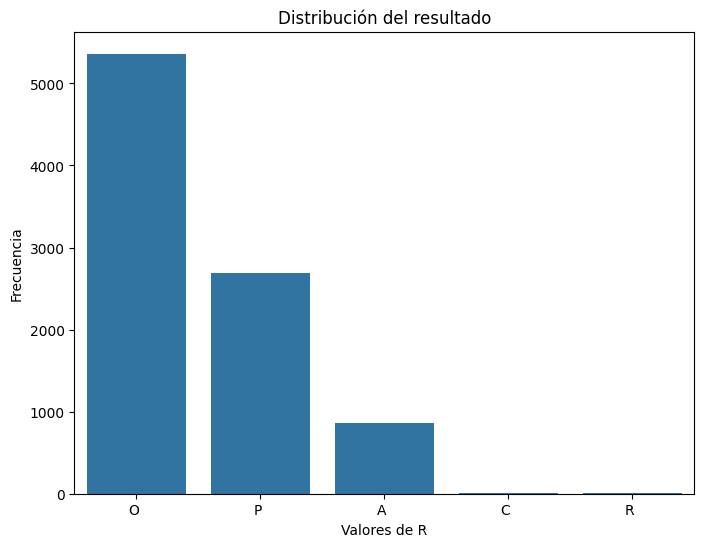

In [ ]:
##Graficamos el resultado de las inseminaciones y observados datos nulos

plt.figure(figsize=(8, 6))
sns.countplot(x='Resultado', data=df)
plt.title('Distribución del resultado')
plt.xlabel('Valores de R')
plt.ylabel('Frecuencia')
plt.show()

##Se puede observar que el mayor resultado es de vacas vacias (O), seguidas de preñadas (P),
## luego abortadas (A) que anteriormente tuvieron que estar preñadas. Las que tuvieron celo y las rechazo, pertenecientes a las vacias son insignificantes a simple vista.

2. ¿Cuál es la distribución de las variables numéricas?

En este análisis se observan todas las variables numéricas.

a- El id es irrelevante.

b. La edad se observa en meses, se debería transformar en años.

c. En cuánto a las lactancias, se observa que es decreciente la cantidad de animales a medida que aumentan las lactancias.

d. Los Dias de abiertas indican que la mayoria de las vacas se preñan antes de los 250 dias.

e. En cuánto a las enfermedades se puede observar que la mayoria de las vacas no tuvieron metritis, retencion de placenta, renga, anestro e hipocalcemia. En cuanto a la mastitis, se analizará la cantidad de vacas afectadas con una  o más eventos. Se debe recordar que estas patologías afectan negativamente la preñez, por ende se observará la correlacion entre el resultado de preñez y las enfermedades.

f. Otro punto iumportantes son los días desde el parto a la primera mastitis, entendiendo que una vaca con mastitis aumentan los días de abiertos y predispone a un resultado vacía. Los dias estan en su mayoría hasta 300.

f. Por otro lado, se observa que el tecnico 15 tiene mayor cantidad de inseminaciones.

<Figure size 1500x1000 with 0 Axes>

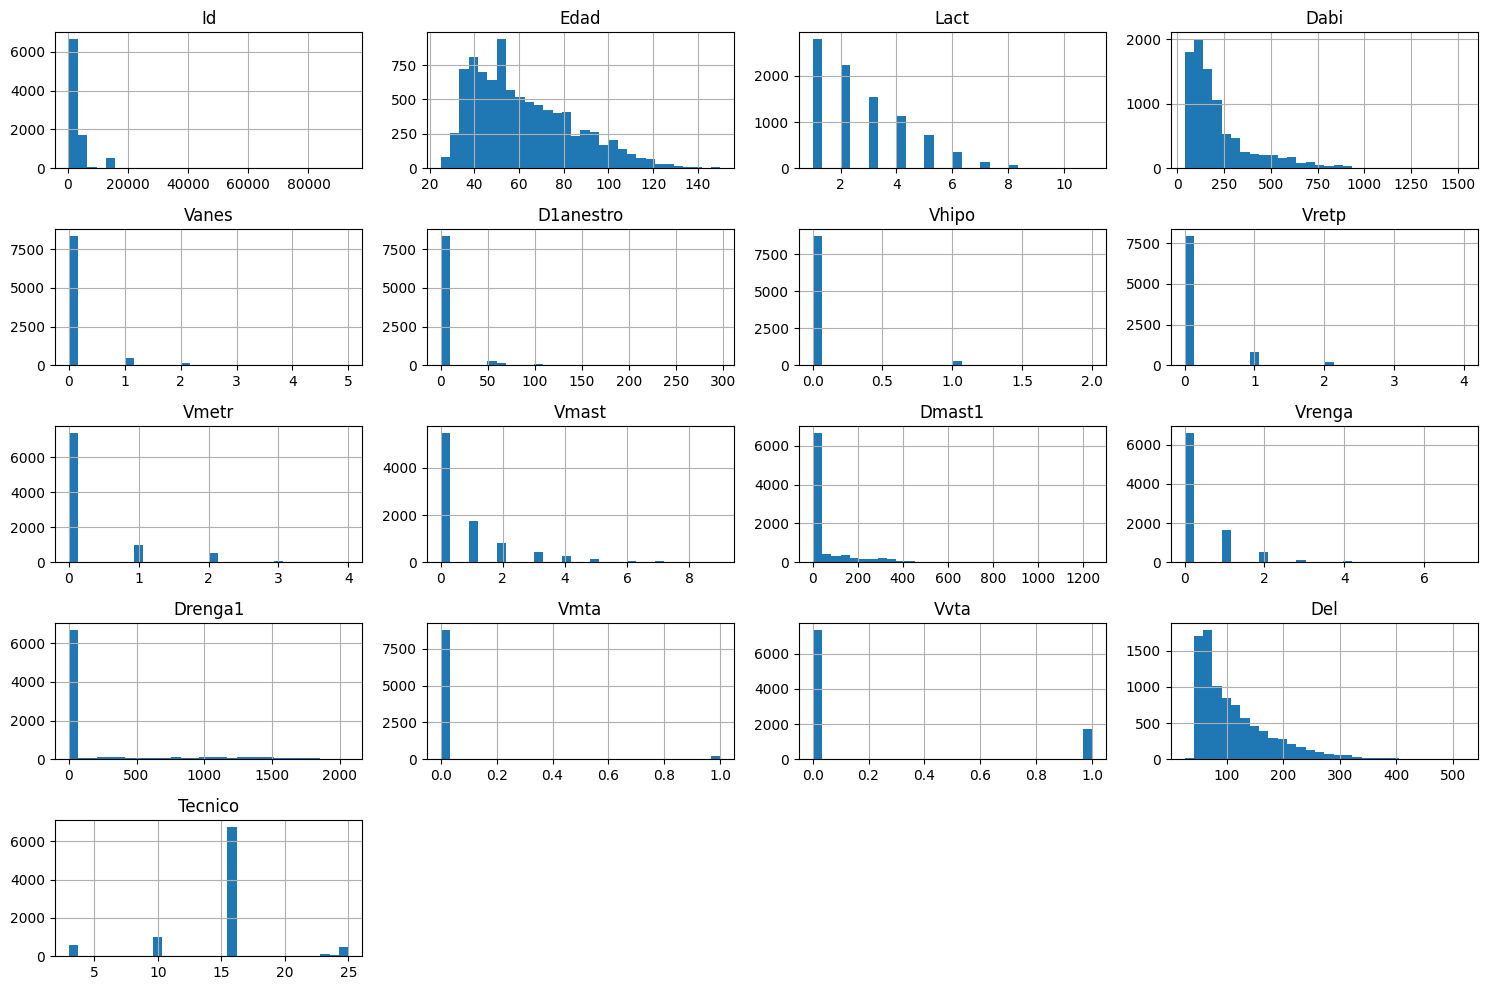

In [ ]:
# Distribución de las variables numéricas.
plt.figure(figsize=(15, 10))
df.select_dtypes(include=['int64', 'float64']).hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

3. ¿Cuál es la relación entre la edad y el resultado de la inseminación?

En este gráfico se puede observar que la media de la edad en vacas vacías y vacas abortadas es mayor que en las vacas preñadas, rechazos y en celo. Se debería transformar la edad en años y además, simplificar el resultado de las inseminaciones en preñadas y vacías.

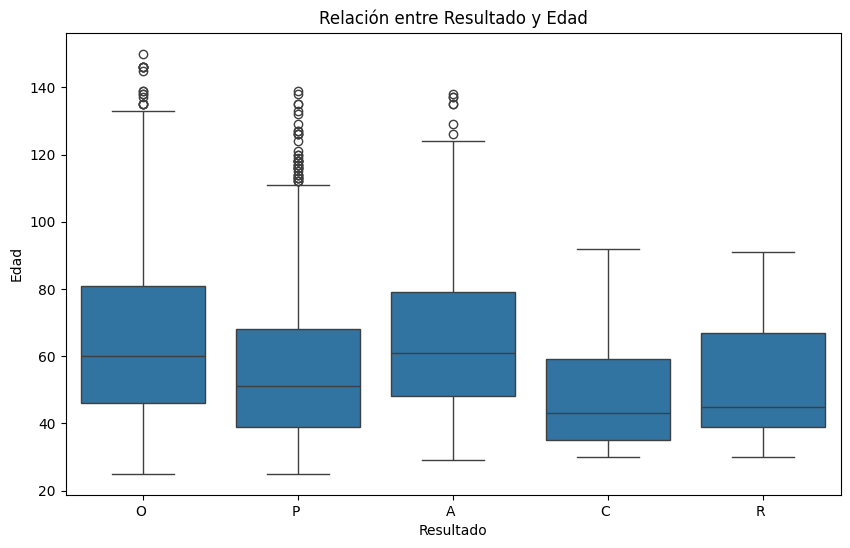

In [ ]:
# Boxplot para ver la relación entre el resultadop con la edad
plt.figure(figsize=(10, 6))
sns.boxplot(x='Resultado', y='Edad', data=df)
plt.title('Relación entre Resultado y Edad')
plt.show()

## **DATA WRANGLING**
A continuación vamos a trabajar con la transformación adecuada de datos para poder modelar el dataset para nuestro algoritmo de machine learning


Vamos a transformar los resultados de la inseminación a un resultado de vacía o preñada.

In [ ]:
# Eliminar espacios en los nombres de las columnas si los hay
df.columns = df.columns.str.strip()

In [ ]:
# Verificar la cantidad de valores nulos antes de eliminarlos
print("Cantidad de valores nulos en 'Resultado' antes de eliminar:")
print(df['Resultado'].isnull().sum())

# Eliminar filas con valores nulos en la columna 'Resultado'
df = df.dropna(subset=['Resultado'])

# Verificar la cantidad de valores nulos después de la limpieza
print("\nCantidad de valores nulos en 'Resultado' después de eliminar:")
print(df['Resultado'].isnull().sum())

Cantidad de valores nulos en 'Resultado' antes de eliminar:
116

Cantidad de valores nulos en 'Resultado' después de eliminar:
0


In [ ]:
## En este caso vamos a reemplazar los valores de la columna Resultado por el diagnostico vacia o preñada.
## Verificar los valores únicos actuales en la columna 'Resultado'
print("Valores únicos antes del reemplazo:")
print(df['Resultado'].unique())

# Reemplazar los valores en la columna 'Resultado'
reemplazos = {
    'O ': 'Vacia',
    'P ': 'Preñada',
    'A ': 'Preñada',
    'C ': 'Vacia',
    'R ': 'Vacia'
}

# Aplicar los reemplazos
df['Resultado'] = df['Resultado'].replace(reemplazos)

# Verificar los valores únicos después del reemplazo
print("\nValores únicos después del reemplazo:")
print(df['Resultado'].unique())

Valores únicos antes del reemplazo:
['O ' 'P ' 'A ' 'C ' 'R ']

Valores únicos después del reemplazo:
['Vacia' 'Preñada']


<ipython-input-18-613fc5d1407a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Resultado'] = df['Resultado'].replace(reemplazos)


4- ¿Cuáles fueron los resultados de las inseminaciones después de los reemplazos?

In [ ]:
##Contamos los valores de la columna Resultado
df['Resultado'].value_counts()

Resultado
Vacia      5379
Preñada    3546
Name: count, dtype: int64

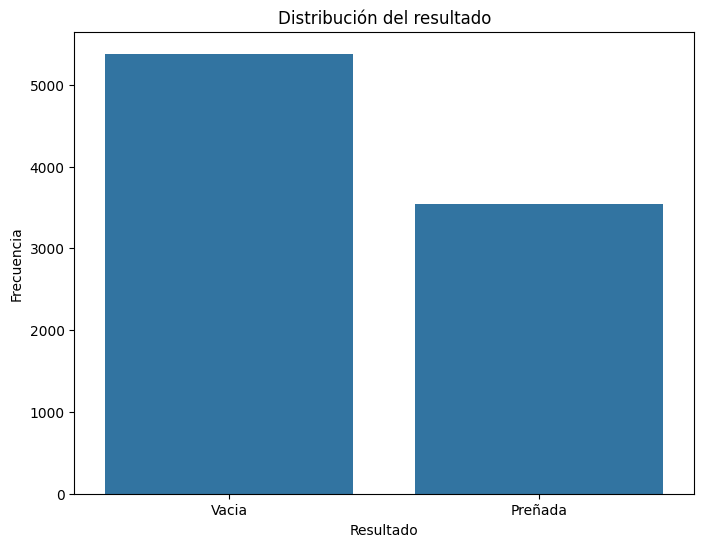

In [ ]:
##Graficamos el resultado de las inseminaciones y observados datos nulos

plt.figure(figsize=(8, 6))
sns.countplot(x='Resultado', data=df)
plt.title('Distribución del resultado')
plt.xlabel('Resultado')
plt.ylabel('Frecuencia')
plt.show()

##Hay una mayor cantidad de animales vacíos que preñados, y es lógico teniendo en cuenta que la concepción en un tambo ronda un 39% anual. La concepcion divide la cantidad de animales preñados sobre las inseminaciones realizadas.

5- ¿Cuál es la concepción  después de los reemplazos?

Para eso debemos sumar el total de insemianciones y dividir la cantidad de preñadas sobre las mismas.

In [ ]:
##Contamos el total de inseminaciones entendiendo que cada instancia corresponde a una inseminación
df.shape[0]

8925

In [ ]:
##Contamos las inseminaciones que fueron preñadas.
total_preñadas = df['Resultado'].value_counts()['Preñada']
total_preñadas

3546

In [ ]:
##Calculamos la proporción de preñadas y vemos su resultado
proporcion_preñadas = total_preñadas / df.shape[0]
proporcion_preñadas

0.3973109243697479

Se puede observar que se obtuvo un 39% de concepcion (preñadas/el total de inseminaciones).

6- Se transformará la edad en años para poder relacionar con el resultado de las inseminaciones.

In [ ]:
##En este caso transformamos la edad al momento de la inseminación, debido a que la edad estaba generalizada al momento actual. Para eso utilizamos la fecha del evento y la fecha de nacimiento del animal
# Convertir las columnas de fecha a tipo datetime
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
df['Fnaci'] = pd.to_datetime(df['Fnaci'], errors='coerce')

# Calcular la nueva edad en días y luego convertir a años
df['Edad'] = (df['Fecha'] - df['Fnaci']).dt.days // 365

# Verificar la nueva distribución de edades
nueva_edad = df['Edad'].value_counts().sort_index()

<ipython-input-23-2315205d42cc>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
<ipython-input-23-2315205d42cc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
<ipython-input-23-2315205d42cc>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Fnaci'] = pd.to_datetime(df['Fnaci'], errors='coerce')
<ipython-input-23-2315205d42cc>:4: SettingWithCopyWarnin

¿Como se distribuye la edad después de los reemplazos?

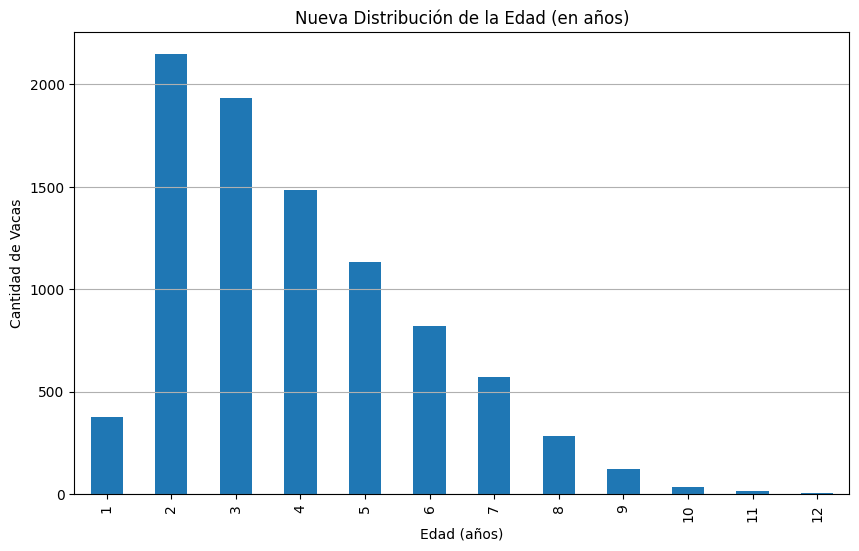

Edad
1      375
2     2149
3     1934
4     1487
5     1132
6      818
7      570
8      282
9      124
10      36
11      13
12       5
Name: count, dtype: int64

In [ ]:
# Graficar la nueva distribución de la edad
plt.figure(figsize=(10, 6))
nueva_edad.plot(kind='bar')
plt.title('Nueva Distribución de la Edad (en años)')
plt.xlabel('Edad (años)')
plt.ylabel('Cantidad de Vacas')
plt.grid(axis='y')
plt.show()

nueva_edad

In [ ]:
media_edad = df['Edad'].mean()
mediana_edad = df['Edad'].median()
print('La media de la edad es:', media_edad)
print('La mediana de la edad es:', mediana_edad)

La media de la edad es: 3.912156862745098
La mediana de la edad es: 4.0


se puede observar que la edad media de la población es de 3,9 años, mientras quer la mediana estña en 4 años.

7. Como se relaciona la edad con el resultado de la inseminacion?

En el siguiente gráfico se puede apreciar que las vacas vacías tienen una edad media mayor con respecto a las vacas preñadas. Un valor que tiene coherencia teniendo en cuenta que una vaca a medida que envejece pierde fertilidad.

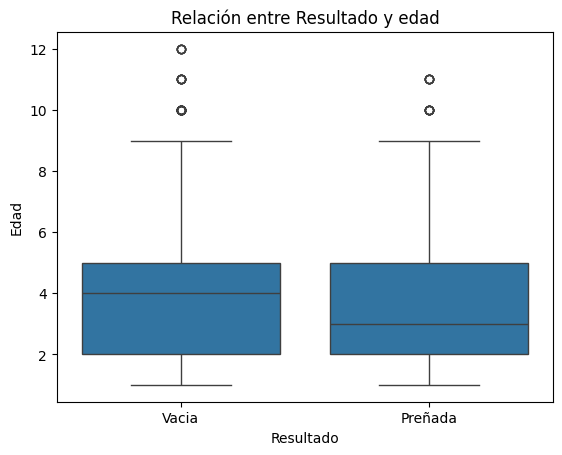

In [ ]:
# Boxplot para ver la relación entre el Resultado con la edad
sns.boxplot(x='Resultado', y='Edad', data=df)
plt.title('Relación entre Resultado y edad')
plt.show()

##Se observa que la edad de los animales preñados es menor que los vacíos, algo coherente con la realidad teniendo en cuenta que a mayor edad menor fertilidad.

8. ¿Cuántas inseminaciones tuvieron las vacas?

Para eso se deberá crear una columna que cuente la cantidad de eventos por grupo de id y de lactancia.

In [ ]:
# Crear la columna VINS que cuenta la cantidad de veces que una vaca tuvo el evento "INSEM" por lactancia
# Suponiendo que 'ID' identifica a cada vaca, 'LACT' identifica la lactancia y 'Evento' identifica el evento

# Contar la cantidad de "INSEMIN" por ID y LACT
cuenta = df[df['Evento'].str.strip() == 'INSEMIN'].groupby(['Id', 'Lact']).size().reset_index(name='Vins')

# Unir esta información al dataframe original
df = df.merge(cuenta, on=['Id', 'Lact'], how='left')

# Rellenar con 0 donde no haya eventos INSEMIN
df['Vins'] = df['Vins'].fillna(0)

# Verificar la nueva columna
df[['Id', 'Lact', 'Vins']].head()

Id  Lact  Vins
0  383     7     1
1  464     7     5
2  464     7     5
3  464     7     5
4  464     7     5

9- ¿Cómo es la distribución de las veces inseminadas para la población y cuál es el valor promedio?

Se puede observar la distribución de los servicios en el siguiente gráfico y la media esta en torno a los 4 servicios.



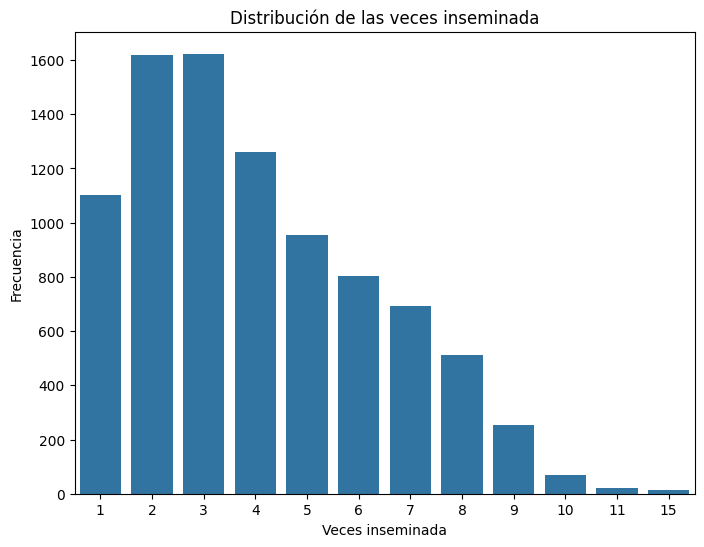

La media de las veces inseminadas es: 4.059047619047619


In [ ]:
##Graficamos las veces inseminadas
plt.figure(figsize=(8, 6))
sns.countplot(x='Vins', data=df )
plt.title('Distribución de las veces inseminada')
plt.xlabel('Veces inseminada')
plt.ylabel('Frecuencia')
plt.show()

media_servicios = df['Vins'].mean()

print('La media de las veces inseminadas es:', media_servicios)

##La mayoria de los animales tienen entre 1 a 5 servicios.

A partir de esto surge un interrogante.
10. La media de los servicios, ¿Varía entre los resultados preñadas y vacia?

Estos gráficos demuestran que las vacas vacías necesitaron de más servicios cuándo se comparan con las vacas preñadas.

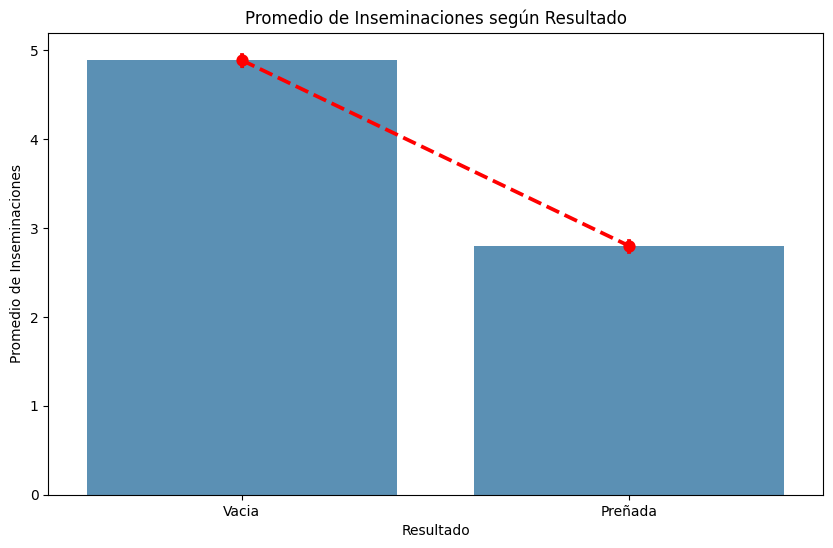

In [ ]:
plt.figure(figsize=(10, 6))

# Gráfico de barras para el promedio de inseminaciones por resultado
sns.barplot(x="Resultado", y="Vins", data=df, alpha=0.8)

# Gráfico de puntos para la tendencia
sns.pointplot(x="Resultado", y="Vins", data=df, color="red", markers="o", linestyles="--")

# Etiquetas y título
plt.xlabel("Resultado")
plt.ylabel("Promedio de Inseminaciones")
plt.title("Promedio de Inseminaciones según Resultado")
plt.show()

Text(0.5, 0, 'Resultado')

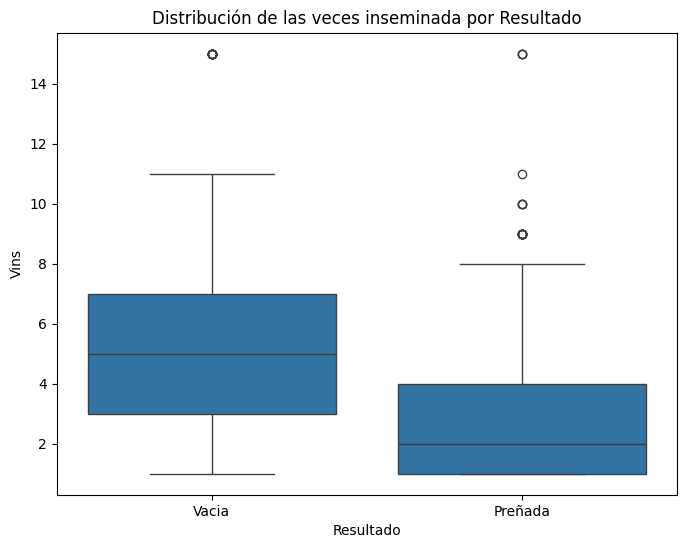

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Resultado', y='Vins', data=df)
plt.title('Distribución de las veces inseminada por Resultado')
plt.xlabel('Resultado')

11. ¿Cuantas lactancias tienen promedio nuestra población y cuál es su distribución?


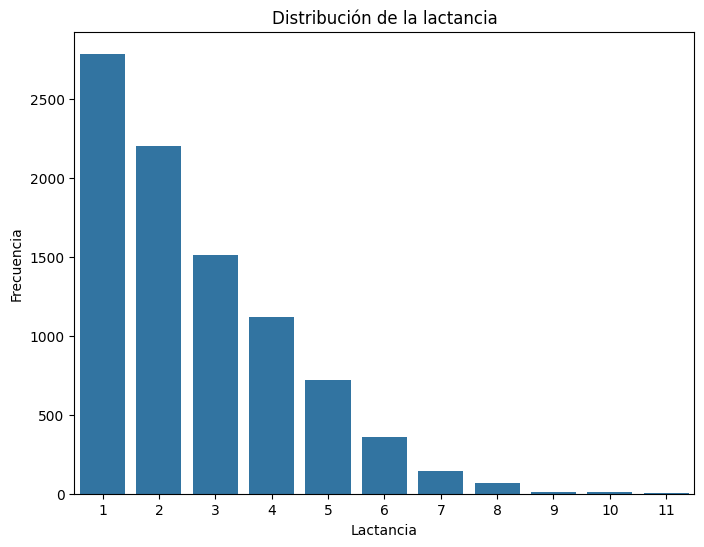

La media de las lactancias es: 2.6573669467787115


In [ ]:
##Graficamos las lactancias
plt.figure(figsize=(8, 6))
sns.countplot(x='Lact', data=df)
plt.title('Distribución de la lactancia')
plt.xlabel('Lactancia')
plt.ylabel('Frecuencia')
plt.show()

media_lactancia = df['Lact'].mean()

print('La media de las lactancias es:', media_lactancia)

12. ¿Como es la distribución de las enfermedades de la población?

Se observa que la que tiene mayor incidencia es la mastitis comparado con las demás

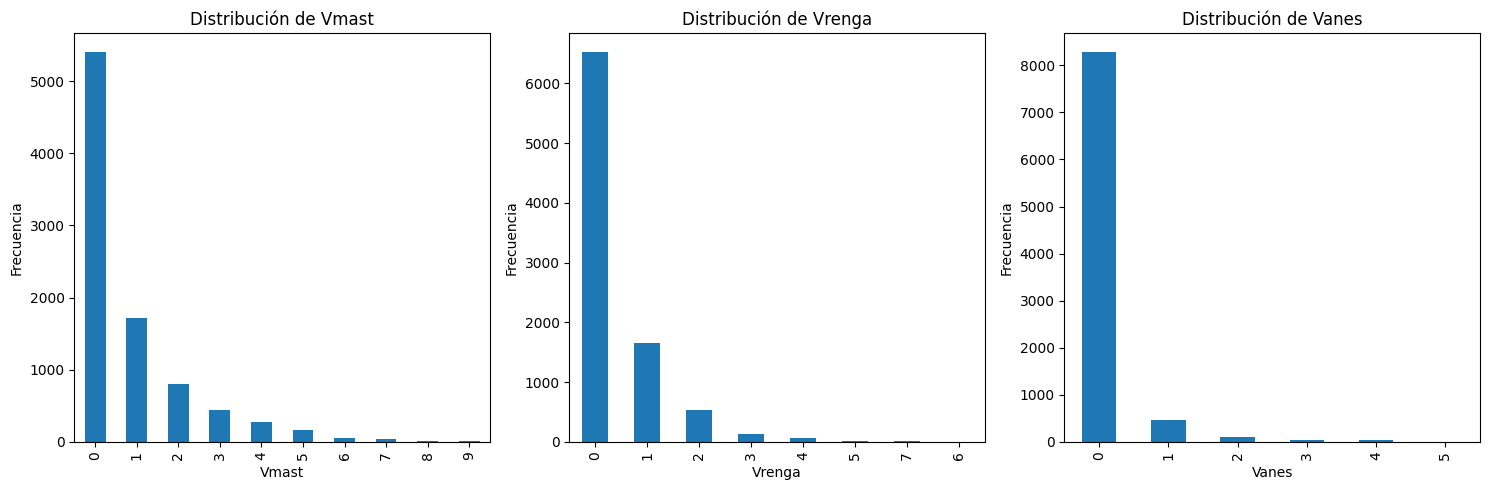

In [ ]:
##Graficamos las enfermedades que pueden afectar la reproducción.

# Definir las tres columnas para graficar
columnas = ['Vmast', 'Vrenga', 'Vanes']

# Configurar el tamaño de los gráficos
plt.figure(figsize=(15, 5))

# Crear tres gráficos de barras
for i, columna in enumerate(columnas):
    plt.subplot(1, 3, i + 1)  # Organiza los gráficos en 1 fila y 3 columnas
    df[columna].value_counts().plot(kind='bar')
    plt.title(f'Distribución de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')

# Ajustar el diseño para que no se superpongan
plt.tight_layout()

# Mostrar los gráficos
plt.show()

12- ¿Cómo impacta la mastitis sobre el resultado de la reproducción?

No se observa un impacto negativo de la mastitis sobre el resultado de la inseminacion

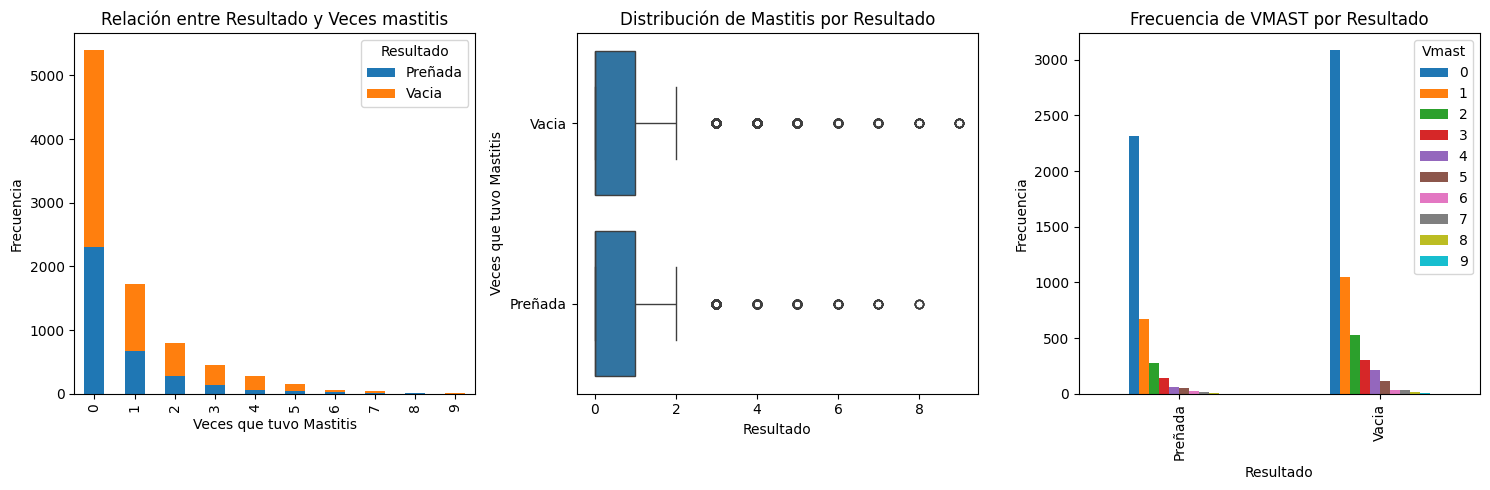

In [ ]:
##Relacionamos las veces mastitis con el resultado del diagnostico

# Configurar el estilo de los gráficos
plt.figure(figsize=(15, 5))

# Gráfico de Barras Apiladas
plt.subplot(1, 3, 1)
pd.crosstab(df['Vmast'], df['Resultado']).plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Relación entre Resultado y Veces mastitis')
plt.xlabel('Veces que tuvo Mastitis')
plt.ylabel('Frecuencia')

# Boxplot (para comparar distribuciones)
plt.subplot(1, 3, 2)
sns.boxplot(x='Vmast', y='Resultado', data=df)
plt.title('Distribución de Mastitis por Resultado')
plt.xlabel('Resultado')
plt.ylabel('Veces que tuvo Mastitis')

# Gráfico de Barras Agrupadas
plt.subplot(1, 3, 3)
pd.crosstab(df['Resultado'], df['Vmast']).plot(kind='bar', ax=plt.gca())
plt.title('Frecuencia de VMAST por Resultado')
plt.xlabel('Resultado')
plt.ylabel('Frecuencia')

# Ajustar el diseño para que no se superpongan
plt.tight_layout()

# Mostrar los gráficos
plt.show()

13. ¿Como es el impacto de las veces que estuvo renga sobre la reproduccion?
Aqui se puede observar que a medida que la vaca tiene eventos de renguera se relaciona con un resultado de vacia.

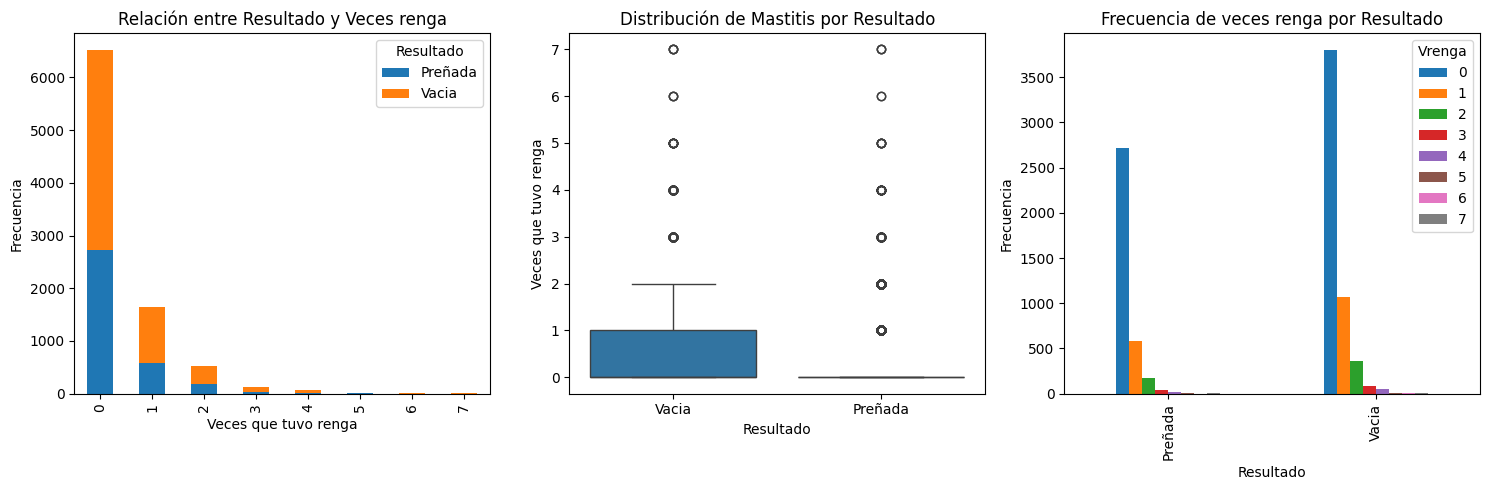

In [ ]:
##Relacionamos las veces renga con el resultado del diagnostico


# Configurar el estilo de los gráficos
plt.figure(figsize=(15, 5))

#  Gráfico de Barras Apiladas
plt.subplot(1, 3, 1)
pd.crosstab(df['Vrenga'], df['Resultado']).plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Relación entre Resultado y Veces renga')
plt.xlabel('Veces que tuvo renga')
plt.ylabel('Frecuencia')

# Boxplot (para comparar distribuciones)
plt.subplot(1, 3, 2)
sns.boxplot(x='Resultado', y='Vrenga', data=df)
plt.title('Distribución de Mastitis por Resultado')
plt.xlabel('Resultado')
plt.ylabel('Veces que tuvo renga')

# Gráfico de Barras Agrupadas
plt.subplot(1, 3, 3)
pd.crosstab(df['Resultado'], df['Vrenga']).plot(kind='bar', ax=plt.gca())
plt.title('Frecuencia de veces renga por Resultado')
plt.xlabel('Resultado')
plt.ylabel('Frecuencia')

# Ajustar el diseño para que no se superpongan
plt.tight_layout()

# Mostrar los gráficos
plt.show()

14. ¿Como es el impacto de las veces que tuvo anestro sobre la reproduccion?

Aqui se observan muchos valores outliers y no se observa una relacion directa.

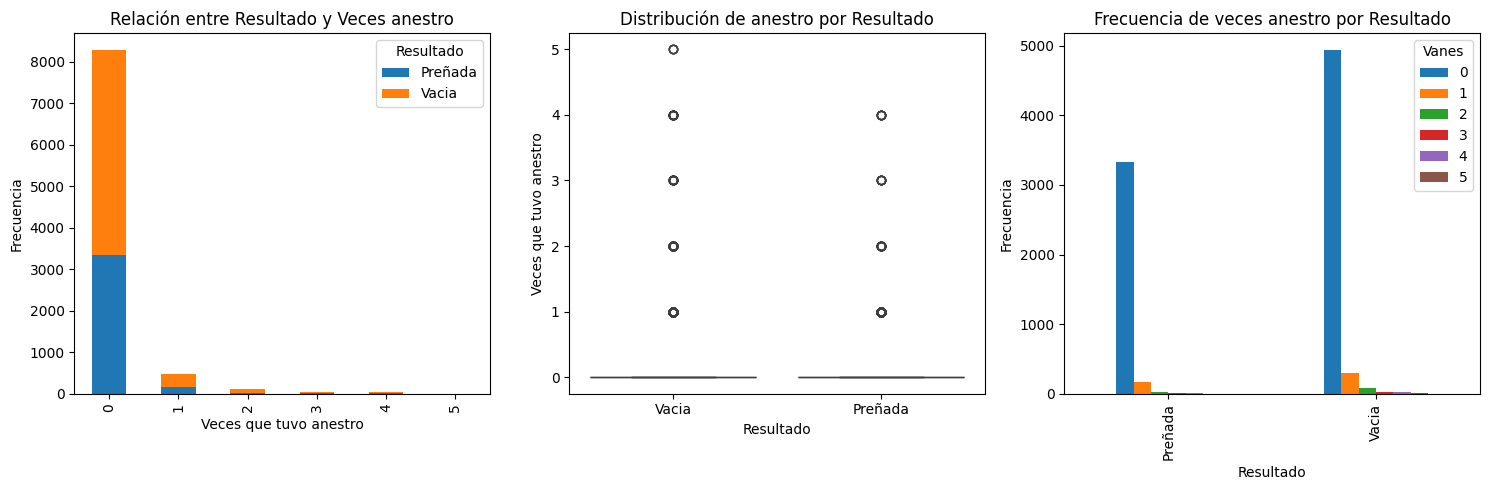

In [ ]:
##Relacionamos las veces anestro con el resultado del diagnostico


# Configurar el estilo de los gráficos
plt.figure(figsize=(15, 5))

# Gráfico de Barras Apiladas
plt.subplot(1, 3, 1)
pd.crosstab(df['Vanes'], df['Resultado']).plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Relación entre Resultado y Veces anestro')
plt.xlabel('Veces que tuvo anestro')
plt.ylabel('Frecuencia')

#  Boxplot (para comparar distribuciones)
plt.subplot(1, 3, 2)
sns.boxplot(x='Resultado', y='Vanes', data=df)
plt.title('Distribución de anestro por Resultado')
plt.xlabel('Resultado')
plt.ylabel('Veces que tuvo anestro')

#  Gráfico de Barras Agrupadas
plt.subplot(1, 3, 3)
pd.crosstab(df['Resultado'], df['Vanes']).plot(kind='bar', ax=plt.gca())
plt.title('Frecuencia de veces anestro por Resultado')
plt.xlabel('Resultado')
plt.ylabel('Frecuencia')

# Ajustar el diseño para que no se superpongan
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [ ]:
df.value_counts('Codigo')

Codigo
N     5080
E     1022
G      625
Q      547
P      482
I      213
S      201
R      194
H      171
T      105
C       94
K       69
J       63
U       30
W       19
M        4
Z        3
X        1
Y        1
Name: count, dtype: int64

Se agruparon los codigos en 4 grandes grupos segun el metodo utilizado y el tipo de semen.

In [ ]:
# Crear un diccionario con los valores a reemplazar
reemplazos = {
    'N': 'Celo_detectado_conv', 'V': 'Celo_detectado_conv', 'P': 'Celo_detectado_conv', 'R': 'Celo_detectado_conv', 'D': 'Celo_detectado_conv',
    'E': 'Celo_detectado_sex', 'L': 'Celo_detectado_sex', 'O': 'Celo_detectado_sex', 'I': 'Celo_detectado_sex',
    'G': 'Iatf_convencional', 'H': 'Iatf_convencional', 'Q': 'Iatf_convencional', 'S': 'Iatf_convencional',
    'T': 'Iatf_convencional', 'Y': 'Iatf_convencional', 'C': 'Iatf_convencional', 'F': 'Iatf_convencional', 'B': 'Iatf_convencional', 'X': 'Iatf_sexado',
    'J': 'Iatf_sexado', 'K': 'Iatf_sexado', 'U': 'Iatf_convencional', 'W': 'Iatf_convencional', 'Y': 'Iatf_convencional', 'Z': 'Iatf_convencional', 'M': 'Iatf_convencional'
}

# Asegurar que la columna no tenga espacios en blanco antes del reemplazo
df['Codigo'] = df['Codigo'].str.strip()

# Aplicar el reemplazo en la columna
df['Codigo'] = df['Codigo'].replace(reemplazos)

# Mostrar el resultado
df.head()

Id  Edad  Lact      Fnaci      Fpart  Dabi  Vanes  D1anestro  Vhipo  \
0  383    11     7 2009-01-05  17/02/20    492      0          0      0   
1  464     9     7 2010-11-06  27/08/19    241      0          0      0   
2  464     9     7 2010-11-06  27/08/19    241      0          0      0   
3  464     9     7 2010-11-06  27/08/19    241      0          0      0   
4  464     9     7 2010-11-06  27/08/19    241      0          0      0   

   Vretp  ...  Vvta       Evento  Del      Fecha              Toro Resultado  \
0      1  ...     1  INSEMIN       72 2020-04-29  IGNITION             Vacia   
1      0  ...     0  INSEMIN      139 2020-01-13  POSH                 Vacia   
2      0  ...     0  INSEMIN      160 2020-03-02  BACK9                Vacia   
3      0  ...     0  INSEMIN      202 2020-03-16  IGNITION             Vacia   
4      0  ...     0  INSEMIN      222 2020-05-04  PARAISO              Vacia   

   Tecnico               Codigo Tecnico_nombre  Vins  
0       16    Iatf_convencional           Toto     1  
1       16  Celo_detectado_conv           Toto     5  
2       16  Celo_detectado_conv           Toto     5  
3       16  Celo_detectado_conv           Toto     5  
4       23  Celo_detectado_conv        Tecn#23     5  

[5 rows x 27 columns]

In [ ]:
## En este caso vamos a reemplazar los valores de la columna Resultado por el diagnostico vacia o preñada.
## Verificar los valores únicos actuales en la columna 'Resultado'
print("Valores únicos antes del reemplazo:")
print(df['Codigo'].unique())

# Reemplazar los valores en la columna 'Resultado'
reemplazos = {
    'Celo_detectado_conv': '0',
    'Celo_detectado_sex': '1',
    'Iatf_convencional': '2',
    'Iatf_sexado': '3',

}

# Aplicar los reemplazos
df['Codigo'] = df['Codigo'].replace(reemplazos)

# Verificar los valores únicos después del reemplazo
print("\nValores únicos después del reemplazo:")
print(df['Codigo'].unique())

Valores únicos antes del reemplazo:
['Iatf_convencional' 'Celo_detectado_conv' 'Celo_detectado_sex'
 'Iatf_sexado' nan]

Valores únicos después del reemplazo:
['2' '0' '1' '3' nan]


In [ ]:
df.isnull().sum()

Id                   0
Edad                 0
Lact                 0
Fnaci                0
Fpart                0
Dabi                 0
Vanes                0
D1anestro            0
Vhipo                0
Vretp                0
Vmetr                0
Vmast                0
Dmast1               0
Vrenga               0
Drenga1              0
Pcet1             6550
Vmta                 0
Vvta                 0
Evento               0
Del                  0
Fecha                0
Toro                 0
Resultado            0
Tecnico              0
Codigo               1
Tecnico_nombre       0
Vins                 0
dtype: int64

In [ ]:
df1 = df.dropna(subset=['Codigo'])

In [ ]:
df.value_counts('Codigo')

Codigo
0    5756
2    1800
1    1235
3     133
Name: count, dtype: int64

In [ ]:
df1.head()

Id  Edad  Lact      Fnaci      Fpart  Dabi  Vanes  D1anestro  Vhipo  \
0  383    11     7 2009-01-05  17/02/20    492      0          0      0   
1  464     9     7 2010-11-06  27/08/19    241      0          0      0   
2  464     9     7 2010-11-06  27/08/19    241      0          0      0   
3  464     9     7 2010-11-06  27/08/19    241      0          0      0   
4  464     9     7 2010-11-06  27/08/19    241      0          0      0   

   Vretp  ...  Vvta       Evento  Del      Fecha              Toro Resultado  \
0      1  ...     1  INSEMIN       72 2020-04-29  IGNITION             Vacia   
1      0  ...     0  INSEMIN      139 2020-01-13  POSH                 Vacia   
2      0  ...     0  INSEMIN      160 2020-03-02  BACK9                Vacia   
3      0  ...     0  INSEMIN      202 2020-03-16  IGNITION             Vacia   
4      0  ...     0  INSEMIN      222 2020-05-04  PARAISO              Vacia   

   Tecnico  Codigo Tecnico_nombre  Vins  
0       16       2           Toto     1  
1       16       0           Toto     5  
2       16       0           Toto     5  
3       16       0           Toto     5  
4       23       0        Tecn#23     5  

[5 rows x 27 columns]

In [ ]:
df1.columns

Index(['Id', 'Edad', 'Lact', 'Fnaci', 'Fpart', 'Dabi', 'Vanes', 'D1anestro',
       'Vhipo', 'Vretp', 'Vmetr', 'Vmast', 'Dmast1', 'Vrenga', 'Drenga1',
       'Pcet1', 'Vmta', 'Vvta', 'Evento', 'Del', 'Fecha', 'Toro', 'Resultado',
       'Tecnico', 'Codigo', 'Tecnico_nombre', 'Vins'],
      dtype='object')

15. Se buscará una relación con los valores numéricos y el resultado de la inseminación.

In [ ]:
# Lista de columnas a seleccionar
columnas = ['Edad', 'Lact', 'Resultado', 'Vanes', 'Vmast', 'Vins', 'Del', 'Tecnico', 'Codigo',
            'Dabi', 'D1anestro', 'Vhipo', 'Vretp', 'Vmetr', 'Dmast1', 'Vrenga', 'Drenga1']

# Filtrar el DataFrame y eliminar valores nulos
df3 = df[columnas].dropna()


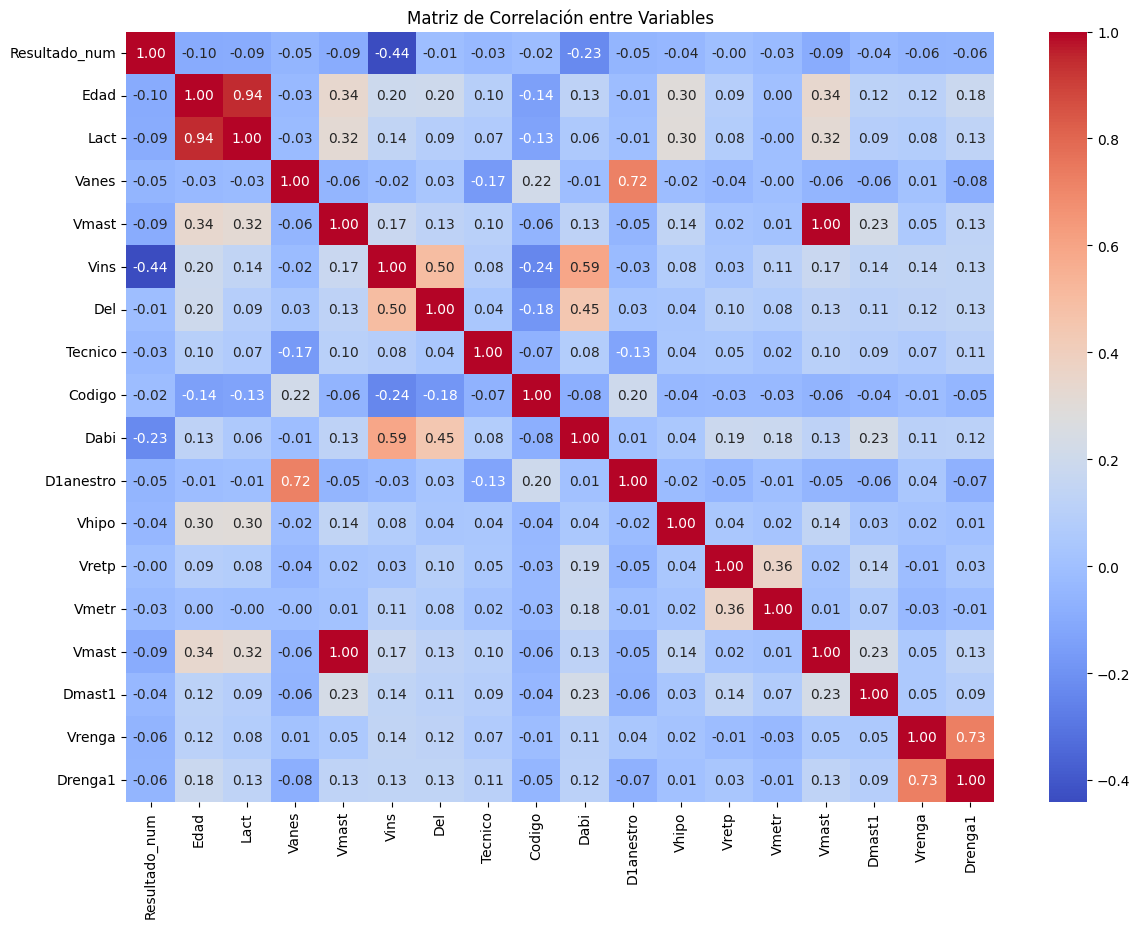

In [ ]:
# Convertir 'Resultado' a numérico para análisis de correlación
df3['Resultado_num'] = df3['Resultado'].map({'Preñada': 1, 'Vacia': 0})

# Matriz de Correlación (Heatmap)
plt.figure(figsize=(14, 10))
corr = df3[['Resultado_num', 'Edad','Lact', 'Vanes','Vmast', 'Vins', 'Del', 'Tecnico', 'Codigo', 'Dabi', 'D1anestro', 'Vhipo', 'Vretp', 'Vmetr', 'Vmast', 'Dmast1', 'Vrenga', 'Drenga1']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Variables')
plt.show()

Se observa una correlacion negativa entre las variables seleccionadas y el resultado de la inseminacion, lo que indica que su presencia predispone a un resultado vacia.

16. Observamos la distribución de las variables en un pairplot.

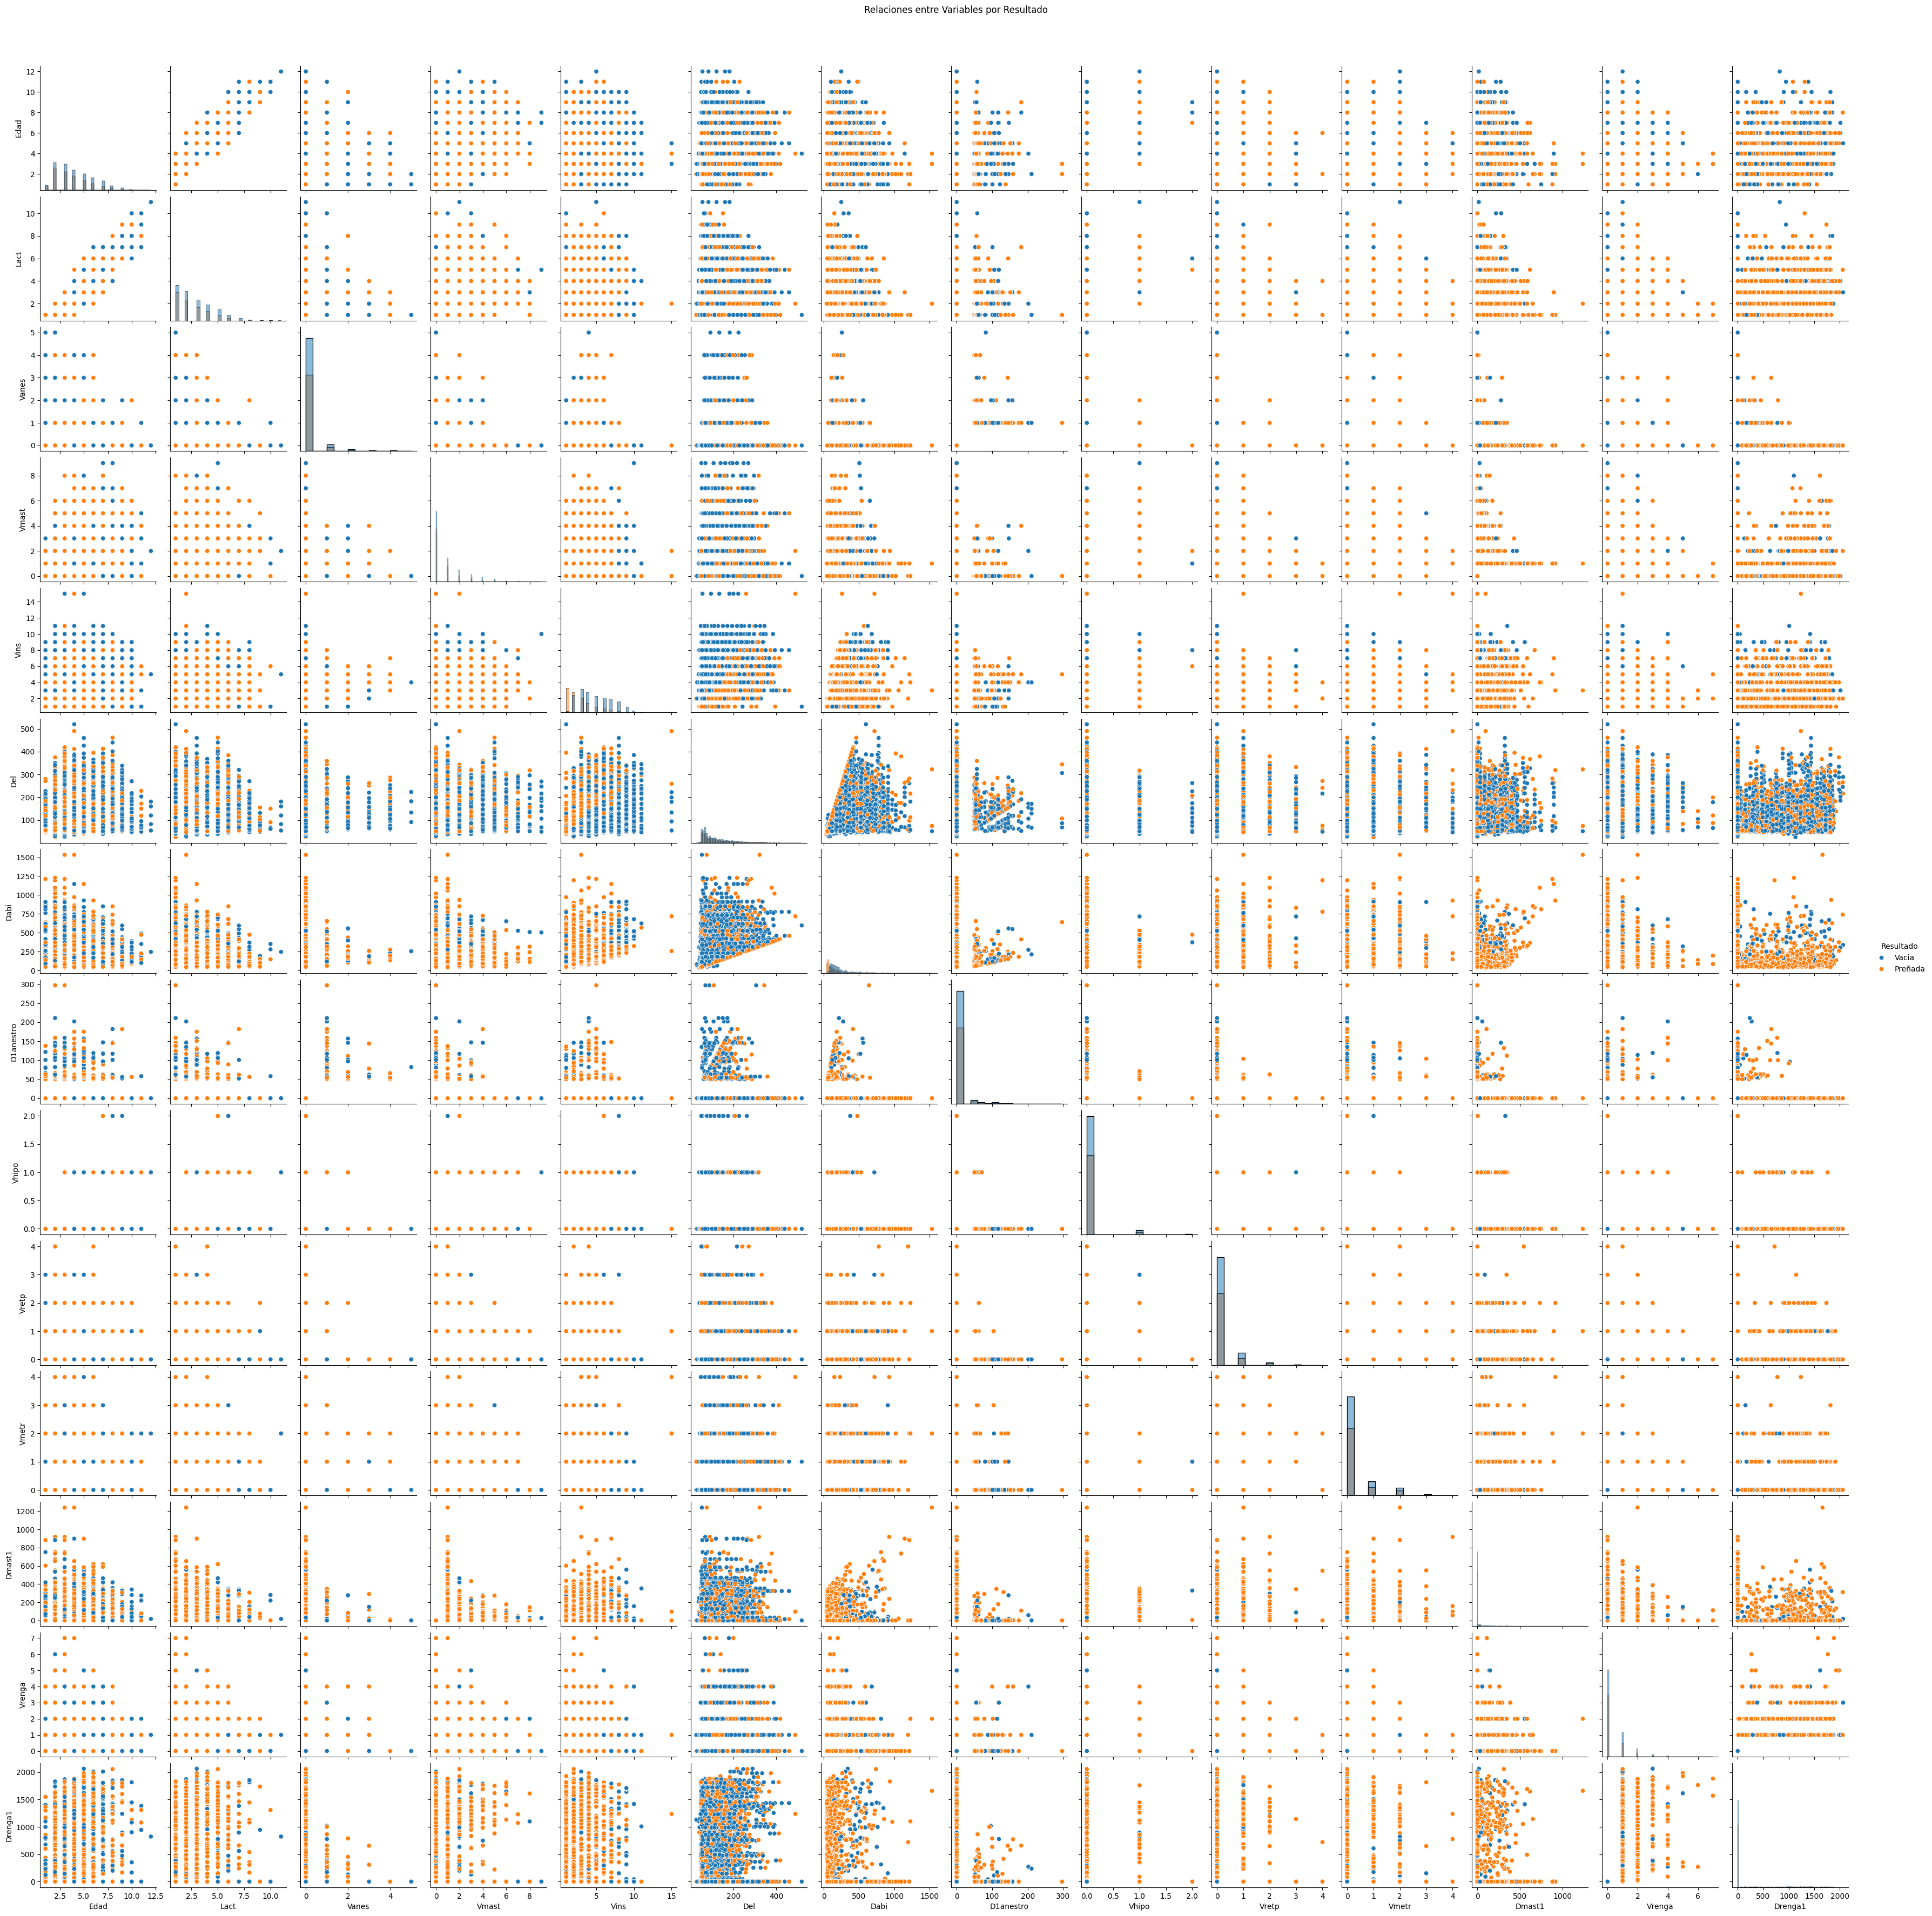

In [ ]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# ... (your existing code for data loading and preparation) ...

# Specify 'hist' for diagonal plots to handle categorical data
sns.pairplot(df3, hue='Resultado', vars=['Edad', 'Lact', 'Vanes', 'Vmast', 'Vins', 'Del', 'Dabi', 'D1anestro', 'Vhipo', 'Vretp', 'Vmetr', 'Dmast1', 'Vrenga', 'Drenga1'], diag_kind='hist')
plt.suptitle('Relaciones entre Variables por Resultado', y=1.02)
plt.show()

17. Se realizó un boxplot para poder comparar la relacion entre el resultado de la inseminacion y algunas variables que impactan negativamente so bre la misma.

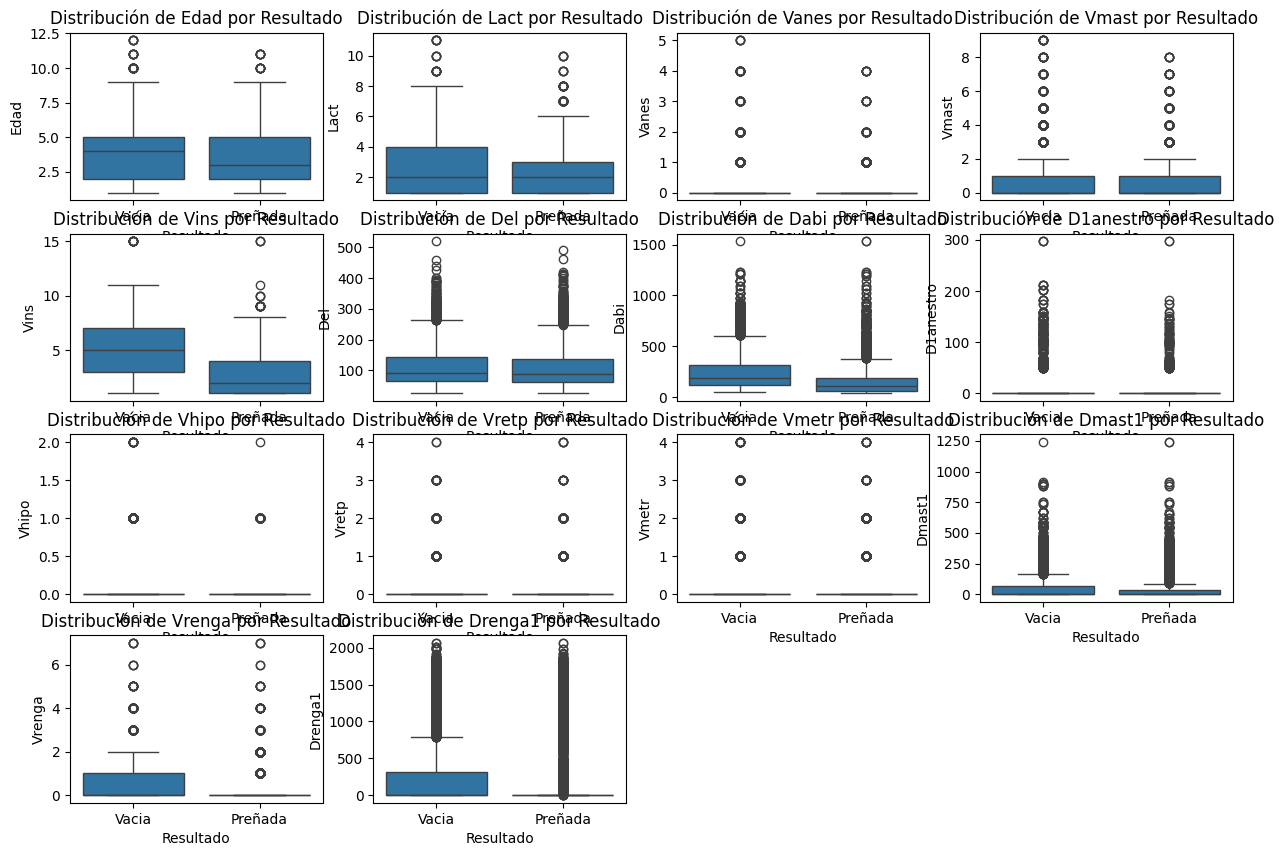

In [ ]:
##Boxplots para Comparar Distribuciones según el Resultado
plt.figure(figsize=(15, 10))
variables=['Edad', 'Lact', 'Vanes', 'Vmast', 'Vins', 'Del', 'Dabi', 'D1anestro', 'Vhipo', 'Vretp', 'Vmetr', 'Dmast1', 'Vrenga', 'Drenga1']

for i, var in enumerate(variables, 1):
    plt.subplot(len(variables) // 4 + (len(variables) % 4 > 0), 4, i) # Create subplots dynamically
    sns.boxplot(x='Resultado', y=var, data=df3) # Pass the current variable (string) to y
    plt.title(f'Distribución de {var} por Resultado')
    plt.xlabel('Resultado')
    plt.ylabel(var)

In [ ]:
#Importar librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# Seleccionar las columnas predictoras y la columna objetivo
columnas_predictoras = ['Edad', 'Lact','Vins', 'Dabi', 'Vanes', 'D1anestro',
       'Vhipo', 'Vretp', 'Vmetr', 'Vmast', 'Dmast1', 'Vrenga', 'Drenga1',
        'Del', 'Tecnico', 'Codigo',]
Columna_objetivo = 'Resultado'

# Filtrar filas completas para el modelo
datos_modelo = df[columnas_predictoras + [Columna_objetivo]].dropna()

# Dividir en características (X) y objetivo (y)
X = datos_modelo[columnas_predictoras]
y = datos_modelo[Columna_objetivo]


In [ ]:
# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:

# Entrenar modelo con todas las dimensiones originales
clf_full = RandomForestClassifier(random_state=42)
clf_full.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred_full = clf_full.predict(X_test)

In [ ]:
# Evaluar resultados con full dataset
accuracy_full = accuracy_score(y_test, y_pred_full)
accuracy_full

0.8622106049290515

In [ ]:
# Evaluar el modelo
y_pred = clf_full.predict(X_test)  # Corrección aquí
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=['Vacia', 'Preñada'])

# Imprimir resultados
print("Precisión general (Accuracy):", accuracy)
print("\nReporte de clasificación:\n", classification_rep)

Precisión general (Accuracy): 0.8622106049290515

Reporte de clasificación:
               precision    recall  f1-score   support

       Vacia       0.89      0.75      0.81      1080
     Preñada       0.85      0.94      0.89      1598

    accuracy                           0.86      2678
   macro avg       0.87      0.84      0.85      2678
weighted avg       0.87      0.86      0.86      2678



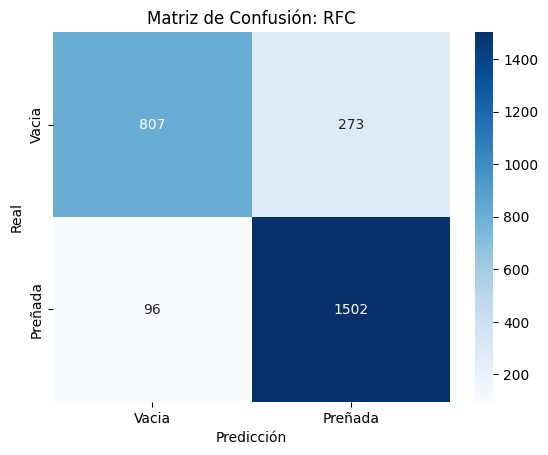

In [ ]:
# Matriz de confusión
clf = confusion_matrix(y_test, y_pred_full)
sns.heatmap(clf, annot=True, fmt='d', cmap='Blues', xticklabels=['Vacia', 'Preñada'], yticklabels=['Vacia', 'Preñada'])
plt.title("Matriz de Confusión: RFC")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

In [ ]:
# Obtener la importancia de cada variable
importancia = clf_full.feature_importances_

# Crear un DataFrame para visualizar mejor
importancia_vars = pd.DataFrame({'Variable': columnas_predictoras, 'Importancia': importancia}) # Use 'importancia' instead of 'importancias'

# Ordenar de mayor a menor importancia
importancia_vars = importancia_vars.sort_values(by='Importancia', ascending=False)

# Mostrar la tabla
importancia_vars

Variable  Importancia
13        Del     0.279310
3        Dabi     0.256335
2        Vins     0.217327
0        Edad     0.036170
10     Dmast1     0.033378
15     Codigo     0.026928
14    Tecnico     0.026039
1        Lact     0.025956
12    Drenga1     0.024154
9       Vmast     0.018413
8       Vmetr     0.013735
11     Vrenga     0.011827
7       Vretp     0.011662
5   D1anestro     0.010192
4       Vanes     0.006081
6       Vhipo     0.002492

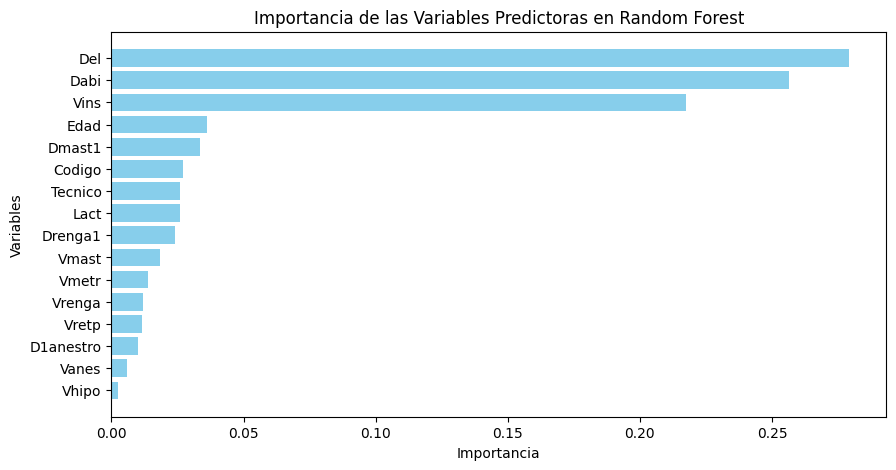

In [ ]:
# Gráfico de barras de importancia de variables
plt.figure(figsize=(10,5))
plt.barh(importancia_vars['Variable'], importancia_vars['Importancia'], color='skyblue')
plt.xlabel("Importancia")
plt.ylabel("Variables")
plt.title("Importancia de las Variables Predictoras en Random Forest")
plt.gca().invert_yaxis()  # Invertir eje para que la más importante esté arriba
plt.show()

In [ ]:
# Seleccionar las columnas predictoras y la columna objetivo
columnas_predictoras = ['Edad', 'Lact','Vins', 'Dabi',
       'Dmast1', 'Drenga1', 'Del', 'Tecnico', 'Codigo']
Columna_objetivo = 'Resultado'

# Filtrar filas completas para el modelo
datos_modelo = df[columnas_predictoras + [Columna_objetivo]].dropna()

# Dividir en características (X) y objetivo (y)
X = datos_modelo[columnas_predictoras]
y = datos_modelo[Columna_objetivo]

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Random Forest
modelo = RandomForestClassifier(random_state=42, n_estimators=100)
modelo.fit(X_train, y_train)  # Corrección aquí

# Evaluar el modelo
y_pred = modelo.predict(X_test)  # Corrección aquí
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=['Vacia', 'Preñada'])

# Imprimir resultados
print("Precisión general (Accuracy):", accuracy)
print("\nReporte de clasificación:\n", classification_rep)

Precisión general (Accuracy): 0.8879551820728291

Reporte de clasificación:
               precision    recall  f1-score   support

       Vacia       0.91      0.79      0.85       707
     Preñada       0.88      0.95      0.91      1078

    accuracy                           0.89      1785
   macro avg       0.89      0.87      0.88      1785
weighted avg       0.89      0.89      0.89      1785



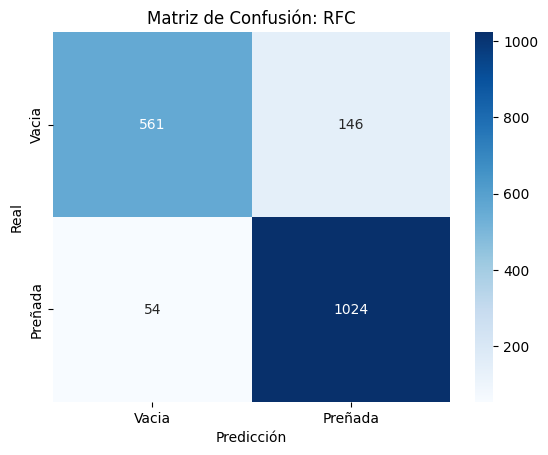

In [ ]:
##Matriz de confusion
clf = confusion_matrix(y_test, y_pred)
sns.heatmap(clf, annot=True, fmt='d', cmap='Blues', xticklabels=['Vacia', 'Preñada'], yticklabels=['Vacia', 'Preñada'])
plt.title("Matriz de Confusión: RFC")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

In [ ]:
# Obtener la importancia de cada variable
importancias = modelo.feature_importances_

# Crear un DataFrame para visualizar mejor
importancia_vars = pd.DataFrame({'Variable': columnas_predictoras, 'Importancia': importancias})

# Ordenar de mayor a menor importancia
importancia_vars = importancia_vars.sort_values(by='Importancia', ascending=False)

# Mostrar la tabla
importancia_vars

Variable  Importancia
6      Del     0.304077
3     Dabi     0.280966
2     Vins     0.230789
4   Dmast1     0.039396
0     Edad     0.036084
5  Drenga1     0.030527
8   Codigo     0.027815
1     Lact     0.025755
7  Tecnico     0.024592

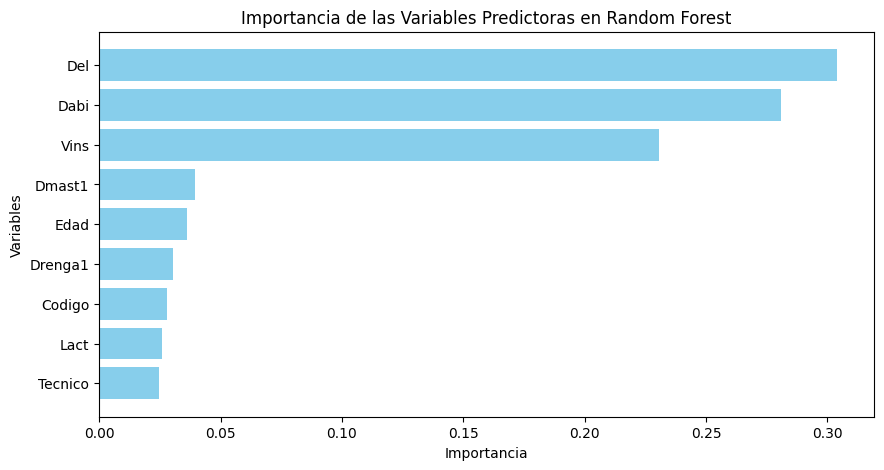

In [ ]:
# Gráfico de barras de importancia de variables
plt.figure(figsize=(10,5))
plt.barh(importancia_vars['Variable'], importancia_vars['Importancia'], color='skyblue')
plt.xlabel("Importancia")
plt.ylabel("Variables")
plt.title("Importancia de las Variables Predictoras en Random Forest")
plt.gca().invert_yaxis()  # Invertir eje para que la más importante esté arriba
plt.show()

In [ ]:
# Estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Aplicar PCA para reducir dimensiones a 3 componentes principales
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
X_train_pca

array([[-1.82596368,  0.07903634,  1.40649126],
       [ 0.75071688,  0.08368751, -0.76234238],
       [-2.09911345,  0.10941998,  0.91784221],
       ...,
       [-1.41217713, -0.74434711,  0.07538047],
       [ 1.85065023, -0.10312801, -0.72723904],
       [-0.90530913,  0.0127416 , -0.29887157]])

In [ ]:
# Entrenar modelo con dimensiones reducidas por PCA
clf_reduced = RandomForestClassifier(random_state=42)
clf_reduced.fit(X_train_pca, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_reduced = clf_reduced.predict(X_test_pca)

In [ ]:
# Evaluar resultados con 3 componentes principales
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
accuracy_reduced

0.6974789915966386

In [ ]:
# Evaluar el modelo

classification_rep = classification_report(y_test, y_pred_reduced, target_names=['Vacia', 'Preñada'])
accuracy = accuracy_score(y_test, y_pred_reduced)


# Imprimir resultados
print("Precisión general (Accuracy):", accuracy)
print("\nReporte de clasificación:\n", classification_rep)

Precisión general (Accuracy): 0.6974789915966386

Reporte de clasificación:
               precision    recall  f1-score   support

       Vacia       0.66      0.48      0.56       707
     Preñada       0.71      0.84      0.77      1078

    accuracy                           0.70      1785
   macro avg       0.69      0.66      0.66      1785
weighted avg       0.69      0.70      0.69      1785



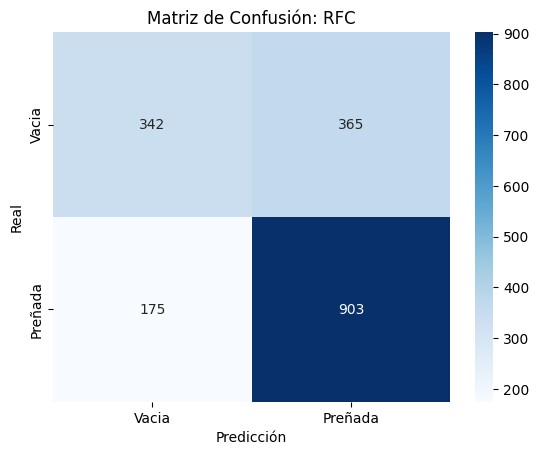

In [ ]:
##Matriz de confusion
clf = confusion_matrix(y_test, y_pred_reduced)
sns.heatmap(clf, annot=True, fmt='d', cmap='Blues', xticklabels=['Vacia', 'Preñada'], yticklabels=['Vacia', 'Preñada'])
plt.title("Matriz de Confusión: RFC")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

En este caso, la tecnica de PCA no tuvo exito para mejorar la prediccion del modelo.

Reporte de Clasificación para KNN:
              precision    recall  f1-score   support

     Preñada       0.76      0.62      0.68       742
       Vacia       0.76      0.86      0.81      1043

    accuracy                           0.76      1785
   macro avg       0.76      0.74      0.75      1785
weighted avg       0.76      0.76      0.76      1785



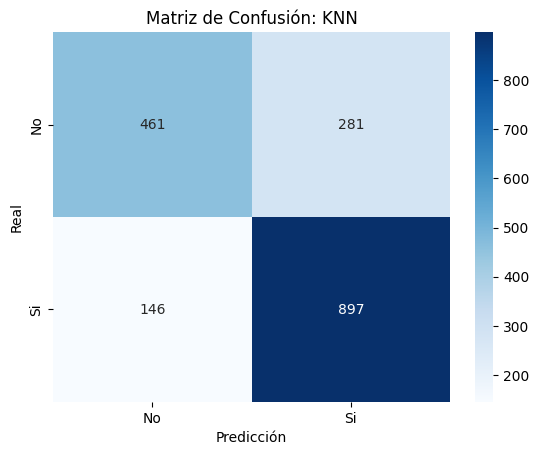

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called 'df'
# ... (load your data into 'df') ...

# Seleccionar las columnas predictoras y la columna objetivo
columnas_predictoras = ['Edad', 'Lact','Vins', 'Dabi', 'Dmast1', 'Drenga1',
        'Del', 'Tecnico', 'Codigo',]
Columna_objetivo = 'Resultado'

# Seleccionar características y objetivo
X = df[columnas_predictoras]
y = df[Columna_objetivo]

# Impute missing values using SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean') # or strategy='median' if you prefer
X_imputed = imputer.fit_transform(X)

# Scale the predictor variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenar el modelo
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Evaluar el modelo
y_pred_knn = knn.predict(X_test)

# Resultados
print("Reporte de Clasificación para KNN:")
print(classification_report(y_test, y_pred_knn))

# Matriz de confusión
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Vacia', 'Preñada'], yticklabels=['Vacia', 'Preñada'])
plt.title("Matriz de Confusión: KNN")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

In [ ]:


from sklearn.utils import resample

# Separar clases
df_vacia = df_original[df_original['Resultado'] == 'Vacia']
df_preenada = df_original[df_original['Resultado'] == 'Preñada']

# Submuestrear la clase mayoritaria (Vacia) para que tenga el mismo tamaño que Preñada
df_vacia_resampled = resample(df_vacia, replace=False, n_samples=len(df_preenada), random_state=42)

# Crear un nuevo dataset balanceado
df_balanceado = pd.concat([df_vacia_resampled, df_preenada])

# Filtrar filas completas para el modelo balanceado
datos_modelo_balanceado = df_balanceado[columnas_predictoras_modificadas + [columna_objetivo]].dropna()

# Dividir en características (X) y objetivo (y)
X_bal = datos_modelo_balanceado[columnas_predictoras_modificadas]
y_bal = datos_modelo_balanceado[columna_objetivo].map({'Vacia': 0, 'Preñada': 1})  # Convertir a numérico


2️⃣ Entrenamiento del Modelo Balanceado
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Dividir en conjuntos de entrenamiento y prueba
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42)

# Entrenar el modelo con el dataset balanceado
modelo_balanceado = RandomForestClassifier(
    random_state=42,
    n_estimators=200,
    max_depth=20,
    min_samples_split=5
)
modelo_balanceado.fit(X_train_bal, y_train_bal)


3️⃣ Ajuste del Umbral de Clasificación
# Obtener las probabilidades de ser "Preñada" en lugar de las predicciones directas
y_prob_bal = modelo_balanceado.predict_proba(X_test_bal)[:, 1]

# Ajustar el umbral de clasificación para que coincida con la tasa real de preñez (39%)
nuevo_umbral_bal = tasa_real_preenadas

# Aplicar el nuevo umbral para reclasificar las predicciones
y_pred_ajustado_bal = (y_prob_bal >= nuevo_umbral_bal).astype(int)


4️⃣ Aplicación del Modelo Mejorado a Nuevas Inseminaciones
# Obtener las probabilidades de ser "Preñada" en el dataset nuevo
y_prob_nuevas_bal = modelo_balanceado.predict_proba(X_nuevas_bal)[:, 1]

# Aplicar el nuevo umbral ajustado para reclasificar las predicciones
predicciones_nuevas_ajustadas = (y_prob_nuevas_bal >= nuevo_umbral_bal).astype(int)

# Agregar las predicciones ajustadas al dataframe de nuevas inseminaciones
df_new['Prediccion_Resultado'] = predicciones_nuevas_ajustadas

# Convertir los valores predichos a etiquetas originales
df_new['Prediccion_Resultado'] = df_new['Prediccion_Resultado'].map({0: 'Vacia', 1: 'Preñada'})


Con estos ajustes, logramos que el modelo prediga 33.58% de preñadas, mucho más cercano a la realidad (39.22%).

Si necesitas más mejoras o explicaciones, dime y seguimos optimizando. ¡Éxitos con el análisis!

SyntaxError: invalid character '️' (U+FE0F) (<ipython-input-5-799f3a8be2ca>, line 21)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Dividir en conjuntos de entrenamiento y prueba
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42)

# Entrenar el modelo con el dataset balanceado
modelo_balanceado = RandomForestClassifier(
    random_state=42,
    n_estimators=200,
    max_depth=20,
    min_samples_split=5
)
modelo_balanceado.fit(X_train_bal, y_train_bal)

# CONCLUSIONES

In [ ]:
# Obtener las probabilidades de ser "Preñada" en lugar de las predicciones directas
y_prob_bal = modelo_balanceado.predict_proba(X_test_bal)[:, 1]

# Ajustar el umbral de clasificación para que coincida con la tasa real de preñez (39%)
nuevo_umbral_bal = tasa_real_preenadas

# Aplicar el nuevo umbral para reclasificar las predicciones
y_pred_ajustado_bal = (y_prob_bal >= nuevo_umbral_bal).astype(int)

NameError: name 'modelo_balanceado' is not defined

In [ ]:
# Obtener las probabilidades de ser "Preñada" en el dataset nuevo
y_prob_nuevas_bal = modelo_balanceado.predict_proba(X_nuevas_bal)[:, 1]

# Aplicar el nuevo umbral ajustado para reclasificar las predicciones
predicciones_nuevas_ajustadas = (y_prob_nuevas_bal >= nuevo_umbral_bal).astype(int)

# Agregar las predicciones ajustadas al dataframe de nuevas inseminaciones
df_new['Prediccion_Resultado'] = predicciones_nuevas_ajustadas

# Convertir los valores predichos a etiquetas originales
df_new['Prediccion_Resultado'] = df_new['Prediccion_Resultado'].map({0: 'Vacia', 1: 'Preñada'})

NameError: name 'modelo_balanceado' is not defined

1- Las variables de mayor importancia que impactan sobre el resultado de una inseminacion fueron:

***Variable	Importancia***
1. 	Del	(dias en lactancia)            0.304
2.  Dias de abierta (Dabi)             0.280
3.  Vins (veces inseminada)            0.230
4. Dmast1 (dias a la primer mastitis)  0.039
5. Edad                                0.036
6. Drenga1 (dias al primer caso)       0.030
7. Codigo (metodo inseminacion)        0.025
8. Lact (lactancia de la vaca)         0.025
9. Tecnico (que la insemino)           0.024



2- El mejor modelo de predicción detectado fue el de Random Forest, logrando una mejor predicción para la categoría preñada sobre la vacía, con un accuracy general de 0.88

3- Este modelo será muy importante en la empresa para predecir el resultado de la inseminacion teniendo en cuenta el impacto sobre la rentabilidad de la empresa.